<a id='content'></a>
# Investigation of Systolic Blood Pressure (SBP) by Men Worldwide
*UDACITY Data Analyst Nanodegree Program*  
*Project 2: Investigation of dataset*  
*by Goran Horvat*  

*Date: May 31st, 2020* 

### Table of Contents
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#wrangling'>Data Wrangling</a></li>
    <ul>
        <li><a href="#my_functions">My Functions</a></li>
        <li><a href="#loading">Loading of Data</a></li>
        <li><a href="#cleaning">Cleaning of Datasets</a></li>
    </ul>
    <li><a href='#eda'>Exploratory Data Analysis</a></li>
    <ul>
        <li><a href='#q1'>Q1: What 10 countries have the highest SBP by men?</a></li>
        <li><a href='#q2'>Q2: In what regions of the world is the highest SBP by men and women respectively?</a></li>
        <li><a href='#q3'>Q3: How did SBP by men in the world regions change over time by region?</a></li>
        <li><a href='#q4'>Q4: What are factors that could affect the change in blood pressure by men?</a></li>
        <li><a href='#q5'>Q5: Is there a correlation between SBP of men's population and GDP per capita?</a></li>
        <li><a href='#q6'>Q6: Does SBP increase with higher BMI in men, and in what regions?</a></li>
        <li><a href='#q7'>Q7: What is the impact of SBP by men on life expectancy in the world?</a></li>
    </ul>
    <li><a href='#conclusions'>Conclusions</a></li>
    <li><a href='#references'>References</a></li>
        

<a id='intro'></a>
## Introduction

> *In this exploration, we will investigate systolic blood pressure (SBP) by men.
Data are obtained through the Gapminder web site https://www.gapminder.org/data/. 
In this research, we have dependent indicator systolic blood pressure (SBP) by men, and other indicators which will be observed are GDP per capita, life expectancy, calorie intake, body mass index, and SBP by a women. Observations of the indicators will be conducted through countries, world regions and by years.*  
<lf>  
> **What is blood pressure / systolic blood pressure SBP ?**  
> " Blood pressure is usually expressed in terms of the ``systolic pressure`` (maximum during one heartbeat) over diastolic pressure (minimum in between two heartbeats) and is measured in millimeters of mercury (mmHg), above the surrounding atmospheric pressure. The average blood pressure, age standardized,... at approx. 127/79 mmHg in men and 122/77 mmHg in women, although these average data mask quite large divergent regional trends. " <a href='https://en.wikipedia.org/wiki/Blood_pressure'>(source: Wikipedia)</a>  
<lf>

![bloodpressurereadingschart.jpg](bloodpressurereadingschart.jpg)



         picture from https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

> "Typically, more attention is given to systolic blood pressure (the first number) as a major risk factor for cardiovascular disease for people over 50. In most people, systolic blood pressure rises steadily with age due to the increasing stiffness of large arteries, long-term buildup of plaque and an increased incidence of cardiac and vascular disease. However, either an elevated systolic or an elevated diastolic blood pressure reading may be used to make a diagnosis of high blood pressure. According to recent studies, the risk of death from ischemic heart disease and stroke doubles with every 20 mm Hg systolic or 10 mm Hg diastolic increase among people from age 40 to 89." <a href='https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings'>(source: American Heart Association)</a>

> **Exploration of data** will be conducted on seven .csv files obtained from .xlsx files and all files will be loaded in a separate   
data frames. Here is a description of the indicators used for this exploration together with dataframe name and .csv file.<br/>  
> ``df_gdp = income_per_person_gdppercapita_ppp_inflation_adjusted.csv  ``  
GDP per capita measures the value of everything produced in a country during a year, divided by the number of people. The data is adjusted for inflation and purchasing power parity (PPP).  <br/>  
> ``df_life = life_expectancy_male.csv``  
The average number of years a newborn child would live if current mortality patterns stayed the same.  <br/>  
> ``df_kcal = food_supply_kilocalories_per_person_and_day.csv``  
Food supply <u>(kilocalories / person & day)</u>. Calories measures the energy content of the food. The required intake varies, but it is normally in the range of 1500-3000 kilocalories per day.  <br/>   
> ``df_sbpm = blood_pressure_sbpmen_mmhg.csv``  
The mean SBP (Systolic Blood Pressure) of the male population, counted in <u>mmHg</u>, this mean is calculated as if each country has the same age composition as the world population.  <br/>   
> ``df_sbpw= blood_pressure_sbpwomen_mmhg.csv``  
The mean SBP (Systolic Blood Pressure) of the female population, counted in <u>mmHg</u>, this mean is calculated as if each country has the same age composition as the world population.  <br/>   
> ``df_bmi = body_mass_index_bmi_men_kgperm2.csv``  
The mean BMI (Body Mass Index) of the male population, counted in <u>kilogram per square meter</u>, this mean is calculated as if each country has the same age composition as the world population.   <br/>  
> ``df_regions = Data Geographies - v1 - by Gapminder.csv``  
Countries are divided into different regions of world. 

<a id='questions'></a>
###  Questions
>  *From the data at our disposal we can ask these questions which we will try to answer in this research:*
    
>**Q1.** What 10 countries have the highest SBP by men?<br/>  
>**Q2.** In what regions of the world is the highest systolic blood pressure (SBP) by men and women respectively? <br/>  
>**Q3.** How did SBP by men in the world regions change over time by region?<br/>      
>**Q4.** What are other factors that could affect the change in blood pressure by men?<br/>          
>**Q5.** Is there a correlation between SBP of men's population and GDP per capita? <br/>      
>**Q6.** Does SBP increase with higher BMI in men, and in what regions?  <br/>      
>**Q7.** What is the impact of SBP by men on life expectancy in the world?  

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# importing of python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     #  the Seaborn library is in use only to make charts look better

sns.set(style='whitegrid')
%matplotlib inline

<a id='my_functions'></a>
### My Functions

In [2]:
def func_desc(df):
    
    '''
    This function use dataframe of data per indicator and return new dataframe with info and statistics.
    
    Args:
        df (dataframe): DataFrame of indicator
    Returns:
        desc (dataframe): DataFrame of calculated information and statistics
            Description of desc:
    
                number of: 
                            countries (rows)
                            years (columns)
                            null values
                            duplicated values
                data type of:
                            variable country
                            year variables
                minimum values of the indicator for years:
                            1980
                            2008
                maximum values of the indicator for years:
                            1980
                            2008
                mean values of the indicator for years:
                            1980
                            2008
                median values of the indicator for years:
                            1980
                            2008
    '''
    
    desc = pd.DataFrame(data = [df.shape[0],
                                str(df.shape[1]-1) + ' from ' + df.columns[1] + ':' + df.columns[-1],
                                df.isnull().sum().sum(),
                                df.duplicated().sum(), 
                                df.iloc[:,0].dtypes, 
                                {x for x in df.iloc[:,1:].dtypes},
                                str(df.iloc[df.iloc[:,1].idxmin(),0]) +': '+ str(df.iloc[:,1].min()),
                                str(df.iloc[df.iloc[:,1].idxmax(),0]) +': '+  str(df.iloc[:,1].max()),
                                str(df.iloc[df.iloc[:,-1].idxmin(),0]) +': '+  str(df.iloc[:,-1].min()),
                                str(df.iloc[df.iloc[:,-1].idxmax(),0]) +': '+  str(df.iloc[:,-1].max()),
                                df.iloc[:,1].mean(),
                                df.iloc[:,1].median(),
                                df.iloc[:,-1].mean(),
                                df.iloc[:,-1].median() ],
                                
                       index=['nr. of countries', 'nr. of years', 'null_values', 'duplicated_values', 
                              'type_country', 'type_years', 
                              '1980_min', '1980_max', '2008_min', '2008_max',
                              '1980_mean', '1980_median', '2008_mean', '2008_median'])
    return desc

In [3]:
def func_trim(df):
    
    '''
    The function trim columns of dataframe from the year 1980 to 2008 what is our exploration period.
    
    Args:
        df (dataframe): DataFrame of indicator
    Returns:
        df_trim (dataframe): Trimmed DataFrame to years from 1980 to 2008                      
    '''
    
    cols = ['country'] + list(df.loc[:,'1980':'2008'].columns)
    df_trim = df.loc[:,cols]
    return df_trim


In [4]:
def func_melting(df, name):
    
    '''
    The function will do a .melt() function on a identifier variables "country".
    
    Args:
        df (dataframe): DataFrame of indicator
        name (string):  Name of dataframe in string format
    Returns:
        df_melt (dataframe): Melted DataFrame   
    '''
    
    indicator = name.split('_')[1]
    df_melt= pd.melt(df, id_vars=['country'], var_name='year', value_name=indicator)
    return df_melt

In [5]:
def func_hist_box(indicator, title, xlabel, rangex):
    
    '''
    The function draws a histogram and a box plot.
    
    Args:
        indicator (string): name of indicator (variable)
        title (string):  Title of plot.
        xlabel (string):  The label of the x-axis.
        rangex (list[integer]):  Range on x-axis (a=minimum value, b=maximum value, c=step).
    Returns:
        First  : Draws a histogram for variable
        Second : Draws a box plot for variable
    '''
    
    # histogram
    fig, ax = plt.subplots(1,1, figsize=(10,4), sharey=False)
    plt.hist(df_data_1980[indicator], bins=20, color='b', label='1980', alpha=0.5)
    plt.hist(df_data_2008[indicator], bins=20, color='r', label='2008', alpha=0.5)
    plt.legend()
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    a,b,c = rangex
    plt.xticks(range(a,b,c), rotation=75)
    plt.ylabel('Frequency', fontsize=14)
    
    # box plot
    fig, ax = plt.subplots(1,1,figsize=(10,4))
    plt.boxplot([df_data_2008[indicator],df_data_1980[indicator]], vert=False,  meanline=True, showmeans=True)
    plt.title('Box plot', fontsize=14)
    plt.xticks(range(a,b,c), rotation=75)
    plt.yticks([1,2], ['2008', '1980'])
    plt.ylabel('Years', rotation=0, fontsize=14)
    plt.xlabel(xlabel, rotation=0, fontsize=14);

In [6]:
# Top 10 countries with highest GDP per capita in 1980 and 2008

def func_top10(indicator, title, xlabel, rangex):
    
    '''
    The function builds a new data frame for variable in the years 1980 and 2008 each year with three columns.
        (country names, region, top_10 values per variable in 1980, 
         country names, region, top_10 values per variable in 2008).
    And draws a scatter plot of this data.
    
    Args:
        indicator (string): name of indicator (variable)
        title (string):  Title of plot.
        xlabel (string):  The label of the x-axis.
        rangex (list[integer]):  Range on x-axis (a=minimum value, b=maximum value, c=step).
    Returns:
        First  : Scatter plot of 10 countries per highest income in 1980 and 2008
        Second : Dataframe of 10 rows and 4 columns for top 10 countries in years 1980 and 2008 per variable
    '''
    # building of dataframe    
    indicator_1980 = df_data_1980[['country','region',indicator]].sort_values(by=indicator, ascending= False).head(10).reset_index(drop=True)
    indicator_2008 = df_data_2008[['country','region',indicator]].sort_values(by=indicator, ascending= False).head(10).reset_index(drop=True)

    df_top10_gdp = pd.concat([indicator_1980, indicator_2008], axis =1, ignore_index =True, sort=True)
    df_top10_gdp.columns = ['country_1980','region_1980', indicator +'_1980', 'country_2008','region_2008', indicator +'_2008']
    
    # scatter plot
    fig, ax = plt.subplots(1,1,figsize=(10,4))
    plt.scatter(df_top10_gdp[indicator +'_1980'], df_top10_gdp['country_1980'], color='b', label='1980', alpha = 0.6)
    plt.scatter(df_top10_gdp[indicator +'_2008'], df_top10_gdp['country_2008'], color='r', label='2008', alpha = 0.6)
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.legend()
    a,b,c = rangex
    plt.xticks(range(a,b,c), rotation=70);

    return df_top10_gdp

In [7]:
def func_range_plot(indicator, title, ylabel, average):
    
    '''
    The function draws the mean or median plot line of variable per regions thru years 1980 to 2008.
    
    Args:
        indicator (string): name of indicator (variable)
        title (string):  Title of plot.
        ylabel (string):  The label of the y-axis.
        average (string): 'mean' or 'median' to define which plotline we want
    Returns:
        Lineplot of regions per variable from 1980 to 2008
    '''
    
    # lineplot
    fig, ax = plt.subplots(1,1,figsize=(10,4))
    if average == 'mean':
        plt.plot(df_data.pivot_table(index='region', columns='year', values=indicator, aggfunc='mean').T.index,
                 df_data.pivot_table(index='region', columns='year', values=indicator, aggfunc='mean').T);
        
        plt.plot(df_data.groupby('year').mean()[indicator].T.index,
                 df_data.groupby('year').mean()[indicator].T, color ='purple', lw=3);
        
    elif average == 'median':
        plt.plot(df_data.pivot_table(index='region', columns='year', values=indicator, aggfunc='median').T.index,
                 df_data.pivot_table(index='region', columns='year', values=indicator, aggfunc='median').T);
        
        plt.plot(df_data.groupby('year').median()[indicator].T.index,
                 df_data.groupby('year').median()[indicator].T, color ='purple', lw=3);
    
    plt.title(average.title() + ' - ' + title, fontsize=14)
    plt.xticks(range(1980,2009), rotation=70)
    plt.xlabel('Years', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(['africa','americas','asia','europe','world'],loc=2, facecolor='white',framealpha=0.9);

<a id='loading'></a>
###  Loading the data

<a id='loadingxlsx'></a>
####  Loading and converting of excel files to .csv files

In [8]:
#Import excel (.xlsx) files, convert to .csv files and save to a separate directory.

import os

path = 'Data\XLSX'
df_list = pd.DataFrame()

all_csv_files = [f for f in os.listdir(path) if f.endswith('.xlsx')]
for f in all_csv_files:
    data = pd.read_excel(os.path.join(path, f))
    data.to_csv('Data\CSV\\'+f[:-5] + '.csv', index=False)


<a id='loadingcsv'></a>
####  Loading the data into data frames
> *Loading the data from .csv files into separate data frames. In this step we will do a quick inspection of every data frame.*

In [9]:
path = 'Data/CSV/' # path where files are saved

df_gdp = pd.read_csv(path + 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_life = pd.read_csv(path + 'life_expectancy_male.csv')
df_kcal = pd.read_csv(path + 'food_supply_kilocalories_per_person_and_day.csv')
df_sbpm = pd.read_csv(path + 'blood_pressure_sbp_men_mmhg.csv')
df_sbpw = pd.read_csv(path + 'blood_pressure_sbp_women_mmhg.csv')
df_bmi = pd.read_csv(path + 'body_mass_index_bmi_men_kgperm2.csv')

In [10]:
df_gdp.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300


In [11]:
df_life.head(2)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,26.9,27.1,27.7,28.2,28.7,29.2,29.7,30.2,30.7,...,74.2,74.4,74.5,74.7,74.8,75.0,75.1,75.3,75.4,75.6
1,Albania,53.2,53.4,54.0,54.7,55.4,56.2,57.2,58.2,59.2,...,87.9,88.0,88.1,88.2,88.3,88.4,88.5,88.6,88.7,88.8


In [12]:
df_kcal.head(2)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,3000.0,2920.0,2700.0,2950.0,2960.0,2740.0,2970.0,2920.0,2940.0,...,1970.0,1950.0,1970,2050,2040,2080,2100,2110,2100,2090
1,Albania,2220.0,2240.0,2160.0,2270.0,2250.0,2250.0,2260.0,2340.0,2400.0,...,2790.0,2870.0,2860,2860,2950,2990,3080,3130,3180,3190


In [13]:
df_sbpm.head(2)

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,126,126
1,Albania,133,133,133,133,133,133,133,133,133,...,132,132,132,133,133,133,133,133,134,134


In [14]:
df_sbpw.head(2)

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,122,122,123,123,123,123,123,123,124,...,124,124,124,124,124,125,125,125,125,125
1,Albania,132,132,132,132,132,132,132,131,131,...,129,129,129,129,129,129,129,129,129,129


In [15]:
df_bmi.head(2)

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,21.5,21.5,21.4,21.4,21.4,21.4,21.4,21.4,21.3,...,20.8,20.7,20.6,20.6,20.6,20.6,20.6,20.6,20.6,20.6
1,Albania,25.2,25.2,25.3,25.3,25.3,25.3,25.3,25.3,25.3,...,25.5,25.6,25.7,25.8,25.9,26.0,26.1,26.2,26.3,26.4


<a id='cleaning'></a>
### Cleaning the data (inspection of the data, trim, and cleaning)
> * The review of the data lets us know that we can observe data from 1980 to 2008 (29 years) because the data for both SBP for men and women and BMI for men are given in this range of years. Our exploration will be concentrate on the years 1980 and 2008, the beginning and end of our observed period.  
Our data will be trimmed in all data frames from the year 1980 to 2008.  
In cleaning process is check if in data are present missing values and duplicated values. For this reason, it is a built a table that gives us a quick review of this specification.  
From table under is visible that are not present duplicated values. In data for calorie intake are presented 369 missing values and we will explore this further.*


In [16]:
# Trimming of data from the year 1980 to 2008

df_gdp = func_trim(df_gdp)
df_life = func_trim(df_life)
df_kcal = func_trim(df_kcal)
df_sbpm = func_trim(df_sbpm)
df_sbpw = func_trim(df_sbpw)
df_bmi = func_trim(df_bmi)

In [17]:
# dataframes of indicator (type: dataframe)
dfs = [df_gdp, df_life, df_kcal, df_sbpm, df_sbpw, df_bmi]

# names od used dataframes as strings, that cam be used also as indicator names (type: string)
names_of_df =  ['df_gdp', 'df_life', 'df_kcal', 'df_sbpm', 'df_sbpw', 'df_bmi']

In [18]:
# The quick overview of the data frames

df_desc=pd.DataFrame()

for df in dfs:
    df_desc = pd.concat([df_desc, func_desc(df)], axis = 1)
df_desc.columns = ['df_gdp', 'df_life', 'df_kcal', 'df_sbpm', 'df_sbpw', 'df_bmi']
df_desc

,df_gdp,df_life,df_kcal,df_sbpm,df_sbpw,df_bmi
nr. of countries,193,184,168,189,189,189
nr. of years,29 from 1980:2008,29 from 1980:2008,29 from 1980:2008,29 from 1980:2008,29 from 1980:2008,29 from 1980:2008
null_values,0,0,369,0,0,0
duplicated_values,0,0,0,0,0,0
type_country,object,object,object,object,object,object
type_years,{int64},{float64},"{int64, float64}",{int64},{int64},{float64}
1980_min,Mozambique: 405,Cambodia: 25.1,Djibouti: 1440.0,Cambodia: 119,Papua New Guinea: 110,Vietnam: 19.0
1980_max,United Arab Emirates: 179000,Iceland: 73.8,Italy: 3600.0,Finland: 143,Qatar: 140,Nauru: 28.1
2008_min,Somalia: 615,Central African Republic: 44.8,Zambia: 1800,Cambodia: 123,Australia: 117,"Congo, Dem. Rep.: 19.9"
2008_max,Qatar: 116000,Iceland: 79.7,Austria: 3720,Estonia: 139,Nigeria: 136,Nauru: 33.9


* ``Duplicate values`` are not present in neither dataframe.

* ``Missing values (Nan)`` are present in --- *df_kcal* --- dataframe for kilocalories per person per day.  
<br/>  
<br/>  
* ``GDP per capita:`` We see that mean GDP per capita in world increase from the year 1980 from 12639 USD  up to 17180 in 2008.  
The biggest difference in mean from minimum and maximum GDP per capita in 1980 is 178595 USD between Mozambique and the United Arab Emirates and in 2008 it was Somalia and Qatar with a difference of 115385 USD.  
<br/>         
* ``Life expectancy:`` Very low life expectancy was in Cambodia in 1980, and in 2008 in the Central African Republic. In contrast, in 1980 and 2008, Iceland had the highest life expectancy in the world.  
<br/>       
* ``Calories:`` The average food intake measures by calories in 1980 is 2507 kcal, but Djibouti that year have only 1440 kcal by the male per day.  The little better situation was in 2008 when Zambia had a minimum of 1800 kcal and on the other side was Austria with 3720 kcal per male per day.  
<br/>      
* ``SBP by men:`` Mean and median of SBP are not so different in both years 1980 and 2008. In the year 1980, The lowest blood pressure was in Cambodia and the highest in Finland.  
<br/>        
* ``SBP by women:`` The same as per male mean and median of SBP for female are not so different in both years 1980 and 2008. In the year 1980, The lowest blood pressure was in Papua New Guinea and the highest in Qatar.  
<br/>       
* ``Body Mass Index by men:``In Nauru was in the year 2008 average male population with a BMI of 33.9 what is obese. The average for the world in the same year was 24.9 on a scale of BMI what is normal.  
"Commonly accepted BMI ranges are underweight (under 18.5 kg/m2), normal weight (18.5 to 25), overweight (25 to 30), and obese (over 30)".  
<a href='https://en.wikipedia.org/wiki/Body_mass_index'>(source Wikipedia)</a>
___

In [19]:
# Preview of dataframe df_kcal where are missing values.

df_kcal.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,2480.0,2480.0,2480.0,2520.0,2450.0,2400.0,2400.0,2730.0,2520.0,...,1850.0,1790.0,1740.0,1830.0,1890.0,1970.0,1950.0,1970,2050,2040
1,Albania,2600.0,2680.0,2660.0,2800.0,2720.0,2570.0,2690.0,2500.0,2590.0,...,2800.0,2730.0,2800.0,2860.0,2770.0,2790.0,2870.0,2860,2860,2950
2,Algeria,2570.0,2600.0,2570.0,2550.0,2500.0,2610.0,2630.0,2630.0,2700.0,...,2840.0,2810.0,2890.0,2930.0,2970.0,2990.0,2960.0,3050,3040,3050
3,Angola,1970.0,1890.0,1760.0,1730.0,1670.0,1690.0,1640.0,1630.0,1610.0,...,1810.0,1790.0,1830.0,1920.0,1980.0,2030.0,2080.0,2120,2170,2250
4,Antigua and Barbuda,1970.0,2050.0,1950.0,2020.0,2250.0,2190.0,2210.0,2270.0,2360.0,...,2160.0,2150.0,2090.0,2070.0,2070.0,2110.0,2330.0,2330,2410,2380


In [20]:
df_kcal.shape

(168, 30)

* Shape od df_kcal dataframe before any action on this dataframe.
___

In [21]:
# Inspection of missing values per countries

pd.options.display.max_columns=50
df_kcal[df_kcal.isnull().sum(axis=1)>0]

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
6,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180.0,2100.0,2180.0,2270.0,2320.0,2330.0,2320.0,2290.0,2240.0,2240.0,2260.0,2430.0,2550.0,2670.0,2760,2760,2870
9,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2320.0,2240.0,2160.0,2130.0,2220.0,2020.0,2120.0,2190.0,2280.0,2370.0,2460.0,2550.0,2640.0,2840.0,3010,3020,3030
13,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.0,3190.0,3130.0,3200.0,3280.0,3280.0,3220.0,3120.0,2990.0,3050.0,2980.0,2820.0,2900.0,2990.0,3080,3190,3200
14,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3710.0,3750.0,3750.0,3720.0,3720.0,3720.0,3720,3710,3700
18,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2350.0,2450.0,2640.0,2640.0,2880.0,3090.0,3020.0,2940.0,2800.0,2900.0,2900.0,2830.0,3090.0,3040.0,3020,3060,3110
36,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2310.0,2240.0,2370.0,2550.0,2550.0,2530.0,2520.0,2540.0,2560.0,2740.0,2820.0,2870.0,2940.0,2980.0,3070,3080,3110
39,Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3040.0,2980.0,3210.0,3320.0,3240.0,3270.0,3120.0,3080.0,3170.0,3240.0,3320.0,3320.0,3320.0,3280,3260,3270
47,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520.0,2580.0,2690.0,2920.0,3060.0,3010.0,2960.0,3110.0,3050.0,3050.0,3040.0,3070.0,3080.0,3170.0,3200,3220,3310
48,Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1510.0,1550.0,1570.0,1660.0,1680.0,1680.0,1730.0,1790.0,1830.0,1840.0,1880.0,1880.0,1980.0,1970,1960,2020
54,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930.0,1910.0,1960.0,2390.0,2540.0,2650.0,2610.0,2610.0,2570.0,2640.0,2750.0,2860.0,2900.0,2980.0,2860,2900,2980


In [22]:
# Number of missing values per country.

pd.concat([df_kcal[df_kcal.isnull().sum(axis=1)>0]['country'],
           df_kcal.isnull().sum(axis=1)[df_kcal.isnull().sum(axis=1)>0]], 
           axis = 1,
           keys=['country', 'nr_of_missing_values']).sort_values(by='nr_of_missing_values', ascending = False)

,country,nr_of_missing_values
129,Serbia,26
100,Montenegro,26
14,Belgium,20
88,Luxembourg,20
39,Czech Republic,13
48,Ethiopia,13
131,Slovak Republic,13
6,Armenia,12
98,Moldova,12
156,Ukraine,12


In [23]:
df_kcal[df_kcal.isnull().sum(axis=1)>0].shape

(27, 30)

* With the inspection of data we had determined that all null values are in the range from the year 1980 up to 2005.  
It is 27 countries with missing values in the range from 10 to 26 years what tells us that in these years data was not collected or recorded.
The best solution is deleting the records for these countries that contain missing values, as any filling in of missing values ​​would lead to erroneous data.
___

In [24]:
df_kcal.drop(df_kcal[df_kcal.isnull().sum(axis=1)>0].index, axis=0, inplace=True)

* We use .drop() function to drop all countries with missing values from dataframe df_kcal
___

In [25]:
df_kcal.shape

(141, 30)

* Shape od df_kcal dataframe before any action on this dataframe.
___

In [26]:
df_kcal['country'].nunique()

141

* Countries by which we had missing values were 27, and they are dropped completely.  
The shape of the cleaned dataframe tells us that in df_kcal  are now present 141 countries in year range from 1980 to 2008.
___

<a id='loadingreg'></a>
####  Loading the data for countries and regions

In [27]:
# Loading a countries from Gapminder .csv file.

df_regions = pd.read_csv('Data Geographies - v1 - by Gapminder.csv')
df_regions.head(2)

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,19.11.1946,South Asia,Low income,NaN
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.0,20.0,14.12.1955,Europe & Central Asia,Upper middle income,NaN


In [28]:
print('The number of countries listed in this dataframe is {}. \n'.format(df_regions['name'].nunique()))

The number of countries listed in this dataframe is 197. 



In [29]:
df_regions = df_regions[['name', 'four_regions']]\
            .rename(columns={'name':'country', 'four_regions':'region'})
df_regions.head(2)

,country,region
0,Afghanistan,asia
1,Albania,europe


In [30]:
df_regions['region'].value_counts()

asia        59
africa      54
europe      49
americas    35
Name: region, dtype: int64

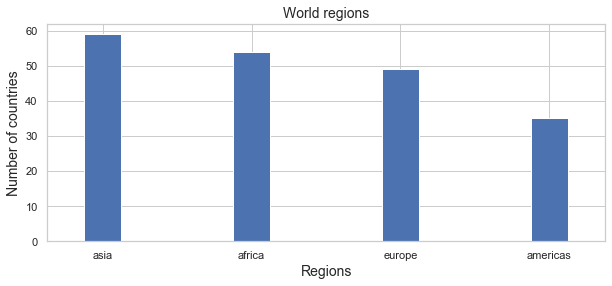

In [31]:
df_regions['region'].value_counts().plot(kind='bar', figsize=(10,4), width=0.25)
plt.title('World regions', fontsize=14)
plt.ylabel('Number of countries', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Regions', fontsize=14);

* Exploration will be on the four main world regions of the world provided by the Gapminder.
In 2017, there were a total of 197 countries in these 4 regions.
Asia has 59 countries, and America has only 35, we will see how many countries will be included in our final and clean dataframe, and in which region will be the most countries..
___

<a id='melt'></a>
#### Melt and Merge the dataframes
> *All dataframes will be melted with identifier variables "country", and the user function "melting" will be used for this operation. After melt() function on every indicator dataframe, we have six new dataframes.*

> *Then we use merge() function to merge all data in one dataframe by name "df_data". Type of merge to be performed is an inner join, on columns "country" and "year".*

In [32]:
df_gdp.head(5)

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,2020,2260,2500,2650,2620,2550,2620,2360,2140,1940,1860,1650,1520,1010,721,1030,942,865,800,735,687,646,1020,1060,1030,1100,1120,1250,1270
1,Albania,4190,4210,4230,4260,4280,4300,4330,4360,4390,4420,4460,3230,3020,3320,3620,4130,4530,4060,4450,5060,5440,5950,6240,6610,7000,7430,7910,8450,9160
2,Algeria,11200,11100,11400,11600,11800,12100,11600,11200,10700,10700,10300,9930,9870,9450,9170,9340,9560,9510,9840,10000,10300,10400,10900,11500,11800,12400,12400,12600,12700
3,Andorra,32100,30800,29900,29100,28400,27800,27600,27900,28200,28400,28400,28000,27200,26000,25900,26100,27200,29700,30800,31900,31700,31800,31900,34500,36300,39800,42700,43400,41400
4,Angola,5110,4930,4610,4340,4260,4210,3760,4130,4650,4670,4760,4650,4240,3120,3060,3410,3750,3890,3950,3900,3890,3920,4320,4300,4610,5110,5500,6040,6470


* Dataframe df_gdp before DataFrame.melt() function
___

In [33]:
# implementing a user function to melt the data frame

df_gdp_melt = func_melting(df_gdp, names_of_df[0])
df_life_melt = func_melting(df_life, names_of_df[1])
df_kcal_melt = func_melting(df_kcal, names_of_df[2])
df_sbpm_melt = func_melting(df_sbpm, names_of_df[3])
df_sbpw_melt = func_melting(df_sbpw, names_of_df[4])
df_bmi_melt = func_melting(df_bmi, names_of_df[5])

In [34]:
df_gdp_melt.head(5)

,country,year,gdp
0,Afghanistan,1980,2020
1,Albania,1980,4190
2,Algeria,1980,11200
3,Andorra,1980,32100
4,Angola,1980,5110


* Dataframe after DataFrame.melt() function
___

In [35]:
# implementing a .merge() function

df_data = pd.merge(df_gdp_melt, df_life_melt, on=['country', 'year'])
df_data = pd.merge(df_data, df_kcal_melt, on=['country', 'year'])
df_data = pd.merge(df_data, df_sbpm_melt, on=['country', 'year'])
df_data = pd.merge(df_data, df_sbpw_melt, on=['country', 'year'])
df_data = pd.merge(df_data, df_bmi_melt, on=['country', 'year'])

* .merge() function on data for all dataframes
___

In [36]:
# Preview of first 5 records of new dataframe with all countries and indicators

df_data.head(5)

,country,year,gdp,life,kcal,sbpm,sbpw,bmi
0,Afghanistan,1980,2020,41.1,2480.0,125,122,21.5
1,Albania,1980,4190,68.5,2600.0,133,132,25.2
2,Algeria,1980,11200,57.0,2570.0,132,131,22.3
3,Angola,1980,5110,38.8,1970.0,135,130,20.9
4,Antigua and Barbuda,1980,8560,66.1,1970.0,133,126,23.3


In [37]:
# Adding (merging) a data of four world regions 

df_data = pd.merge(df_data, df_regions, on=['country'])

In [38]:
# Preview of first 5 records of dataframe df_data with variable "region"

df_data.head(5)

,country,year,gdp,life,kcal,sbpm,sbpw,bmi,region
0,Afghanistan,1980,2020,41.1,2480.0,125,122,21.5,asia
1,Afghanistan,1981,2260,41.7,2480.0,125,122,21.5,asia
2,Afghanistan,1982,2500,42.4,2480.0,125,123,21.4,asia
3,Afghanistan,1983,2650,43.2,2520.0,125,123,21.4,asia
4,Afghanistan,1984,2620,43.9,2450.0,125,123,21.4,asia


In [39]:
df_data.shape

(4031, 9)

In [40]:
df_data['country'].nunique()

139

In [41]:
df_data['year'].nunique(), df_data['year'].min(), df_data['year'].max()

(29, '1980', '2008')

In [42]:
df_data['region'].nunique()

4

In [43]:
df_data['region'].unique()

array(['asia', 'europe', 'africa', 'americas'], dtype=object)

* In new dataframe are 4031 records and 9 columns.<br/>
Column "country" has 139 unique countries, and we have records of indicators for range over 29 years, from 1980 to 2008.<br/>
Our research will be in four world regions (Europe, America, Africa and Asia)

<a id='type'></a>
#### Inspection of data types
> *After merging of dataframes we will do an inspection of data for every variable.*

In [44]:
df_data.head(5)

,country,year,gdp,life,kcal,sbpm,sbpw,bmi,region
0,Afghanistan,1980,2020,41.1,2480.0,125,122,21.5,asia
1,Afghanistan,1981,2260,41.7,2480.0,125,122,21.5,asia
2,Afghanistan,1982,2500,42.4,2480.0,125,123,21.4,asia
3,Afghanistan,1983,2650,43.2,2520.0,125,123,21.4,asia
4,Afghanistan,1984,2620,43.9,2450.0,125,123,21.4,asia


In [45]:
# Function .info() give us the data type for every variable. 

df_data.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4030
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   country  object 
 1   year     object 
 2   gdp      int64  
 3   life     float64
 4   kcal     float64
 5   sbpm     int64  
 6   sbpw     int64  
 7   bmi      float64
 8   region   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 314.9+ KB


* We will further inspect variables ``year`` and ``kcal``because data type doesn't match with data itself.<br/>
___

In [46]:
# View of variable "year"

df_data['year'].unique()

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008'], dtype=object)

* Data type  of variable ``year`` is a  string, but data are quantitative and discrete and should be an integer.<br/> 
___

In [47]:
# View of variable "kcal"

df_data['kcal'].unique()

array([2480., 2520., 2450., 2400., 2730., 2460., 2310., 2040., 1890.,
       1910., 1820., 1840., 1870., 1900., 1850., 1790., 1740., 1830.,
       1970., 1950., 2050., 2600., 2680., 2660., 2800., 2720., 2570.,
       2690., 2500., 2590., 2650., 2880., 2840., 2860., 2770., 2790.,
       2870., 2950., 2550., 2610., 2630., 2700., 2760., 2750., 2780.,
       2810., 2890., 2930., 2970., 2990., 2960., 3050., 3040., 1760.,
       1730., 1670., 1690., 1640., 1630., 1610., 1590., 1560., 1750.,
       1810., 1920., 1980., 2030., 2080., 2120., 2170., 2250., 2020.,
       2190., 2210., 2270., 2360., 2490., 2470., 2530., 2380., 2260.,
       2160., 2150., 2090., 2070., 2110., 2330., 2410., 3220., 3200.,
       3060., 3030., 3120., 3100., 3010., 2910., 3080., 3160., 3130.,
       3270., 3260., 3210., 2980., 3110., 3150., 3070., 3170., 3020.,
       3360., 3350., 3400., 3370., 3430., 3420., 3480., 3510., 3560.,
       3550., 3490., 3610., 3670., 3730., 3650., 3640., 3720., 3740.,
       2740., 2710.,

In [48]:
# Checking to see if in variable "kcal" are values with a decimal value

(df_data['kcal'] % round(df_data['kcal'])).sum()

0.0

* On variable ``kcal`` we need to check if there are values with a decimal value.<br/>
There are no decimal values, and the correct data type for this variable is an integer.<br/>
<br/>

* We will perform the action of transforming the data type using the .astype () function.
___

In [49]:
# Converting data type of variables year and kcal to integer

df_data['year'] = df_data['year'].astype('int64')
df_data['kcal'] = df_data['kcal'].astype('int64')

In [50]:
# Function .info() after transforming variable data type to make a check.

df_data.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4030
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   country  object 
 1   year     int64  
 2   gdp      int64  
 3   life     float64
 4   kcal     int64  
 5   sbpm     int64  
 6   sbpw     int64  
 7   bmi      float64
 8   region   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 314.9+ KB


<a id='dupli'></a>
#### Inspection of duplicated values
> *There are no duplicate values.*

In [51]:
df_data.duplicated().sum()

0

<a id='null'></a>
#### Inspection of null values
> *There are no missing values.*

In [52]:
df_data.isnull().sum()

country    0
year       0
gdp        0
life       0
kcal       0
sbpm       0
sbpw       0
bmi        0
region     0
dtype: int64

In [53]:
df_data.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis
> *In exploration data analysis we will inspect every variable separately and then we will look at the relationship between variables.  
We will start to determine differences for every variable at the start and end of the range of our observation, for the years 1980 and  2008.   
The focus of our inspection will be also to see the differences between regions of the world.*


<a id='insp_var'></a>
### Inspection of each variable separately
> *In the beginning, we have to select data in data frames according to years, regions, and countries to be able to calculate statistics and visualize the results and answer the questions we asked at the beginning of this exploration.  
Creation of two dataframe with data for 1980 and 2008, df_data_1980, and df_data_2008.*

In [54]:
# Data for year 1980

df_data_1980 = df_data.query('year == 1980')
df_data_1980.head()

,country,year,gdp,life,kcal,sbpm,sbpw,bmi,region
0,Afghanistan,1980,2020,41.1,2480,125,122,21.5,asia
29,Albania,1980,4190,68.5,2600,133,132,25.2,europe
58,Algeria,1980,11200,57.0,2570,132,131,22.3,africa
87,Angola,1980,5110,38.8,1970,135,130,20.9,africa
116,Antigua and Barbuda,1980,8560,66.1,1970,133,126,23.3,americas


In [55]:
# Data for year 2008

df_data_2008 = df_data.query('year == 2008')
df_data_2008.head()

,country,year,gdp,life,kcal,sbpm,sbpw,bmi,region
28,Afghanistan,2008,1270,59.1,2040,126,125,20.6,asia
57,Albania,2008,9160,73.5,2950,134,129,26.4,europe
86,Algeria,2008,12700,72.8,3050,130,130,24.6,africa
115,Angola,2008,6470,53.6,2250,134,130,22.3,africa
144,Antigua and Barbuda,2008,26100,72.6,2380,134,125,25.8,americas


In [56]:
# Number of countries per world regions

df_data_1980['region'].value_counts()

africa      44
asia        38
americas    33
europe      24
Name: region, dtype: int64

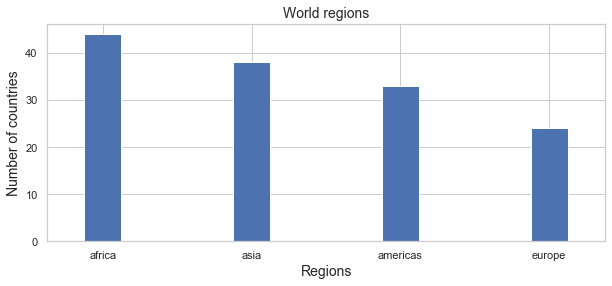

In [57]:
df_data_1980['region'].value_counts().plot(kind='bar', figsize=(10,4), width=0.25);

plt.title('World regions', fontsize=14)
plt.ylabel('Number of countries', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Regions', fontsize=14);

* After merging and cleaning of data in Africa is the most countries per region, and in Europe the less.
___

In [58]:
# Statistics about data in year 1980

describe_df_1980 = df_data_1980.describe()
describe_df_1980

,year,gdp,life,kcal,sbpm,sbpw,bmi
count,139.0,139.000000,139.000000,139.00000,139.000000,139.000000,139.000000
mean,1980.0,11785.604317,58.675540,2510.57554,132.021583,127.589928,22.745324
std,0.0,22086.186496,10.177425,507.40712,4.787465,4.901660,1.889031
min,1980.0,405.000000,25.100000,1440.00000,119.000000,113.000000,19.000000
25%,1980.0,2215.000000,51.700000,2130.00000,129.000000,125.000000,21.050000
50%,1980.0,5050.000000,59.700000,2430.00000,132.000000,128.000000,22.900000
75%,1980.0,12900.000000,66.750000,2905.00000,135.000000,131.000000,24.600000
max,1980.0,179000.000000,73.800000,3600.00000,143.000000,139.000000,25.800000


In [59]:
# Statistics about data in year 2008

describe_df_2008 = df_data_2008.describe()
describe_df_2008

,year,gdp,life,kcal,sbpm,sbpw,bmi
count,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,2008.0,15694.805755,66.681295,2744.460432,130.640288,126.136691,24.620863
std,0.0,17644.713943,9.080466,462.333672,3.516024,4.485405,2.376286
min,2008.0,815.000000,44.800000,1800.000000,123.000000,117.000000,20.400000
25%,2008.0,2905.000000,60.000000,2385.000000,128.000000,123.000000,22.400000
50%,2008.0,9160.000000,69.400000,2660.000000,131.000000,125.000000,25.100000
75%,2008.0,19700.000000,73.350000,3125.000000,133.000000,130.000000,26.700000
max,2008.0,93600.000000,79.700000,3720.000000,139.000000,136.000000,30.400000


In [60]:
# Calculation of the coefficient of variation in the year 1980

coefficient_of_variation_1980 = describe_df_1980.loc['std',] / describe_df_1980.loc['mean',]
coefficient_of_variation_1980

year    0.000000
gdp     1.873997
life    0.173453
kcal    0.202108
sbpm    0.036263
sbpw    0.038417
bmi     0.083051
dtype: float64

In [61]:
# Calculation of the coefficient of variation in the year 1980

coefficient_of_variation_2008 = df_data_2008.describe().loc['std',] / df_data_2008.describe().loc['mean',]
coefficient_of_variation_2008

year    0.000000
gdp     1.124239
life    0.136177
kcal    0.168461
sbpm    0.026914
sbpw    0.035560
bmi     0.096515
dtype: float64

* The coefficient of variation (CV) is a measure of relative variability. It is the ratio of the standard deviation $ \sigma $  to the mean (average) $ \mu $.  
$$ 
\\C_{V} = \frac{\sigma}{\mu}\\
$$
Also known as relative standard deviation (RSD), gives us an insight into the dispersion of the elements of the observed array.  
If the coefficient of variation is higher, then the values of the central value are less representative than when that coefficient of variation is smaller.  

| CV(%) | Variability |
|-|-|
|0-10 | very week |
|10-30| relatively week |
|30-50| moderate |
|50-70| relatively strong |
| > 70| very strong |

* At the ``gdp`` variable we have very strong variability of data and for that reason we will observe average value through the median, while mean is not representative.  
For all other variables, we will observe at the mean.
___

<a id='gdp'></a>
#### Inspection of the dataset: GDP per capita (USD)
> *In the year 1980 the country with the highest GDP per capita was the United Arab Emirates with USD 179000 and in 2008 was Kuwait with USD 93600. On histogram, we see that income is unevenly distributed in the year 1980 and 2008 poorest countries had doubled income and by richest are decreased in income  
From 1980 until 1988 is a decrease and stagnation of world GDP/capita and from then mean of world income rises. Europe and the Americas rise all the time, but Europe increases at a higher rate.*

In [62]:
# Statistics for variable 'gdp'

df_data['gdp'].describe()

count      4031.000000
mean      12506.337385
std       16875.217227
min         312.000000
25%        2315.000000
50%        6150.000000
75%       15300.000000
max      179000.000000
Name: gdp, dtype: float64

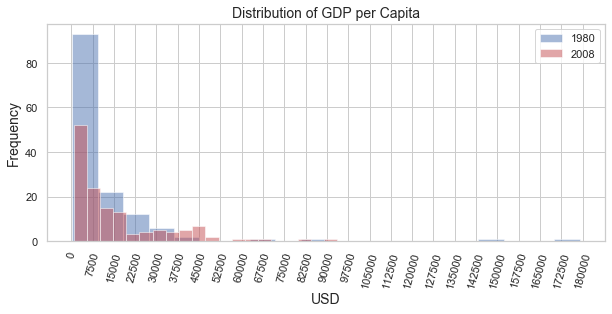

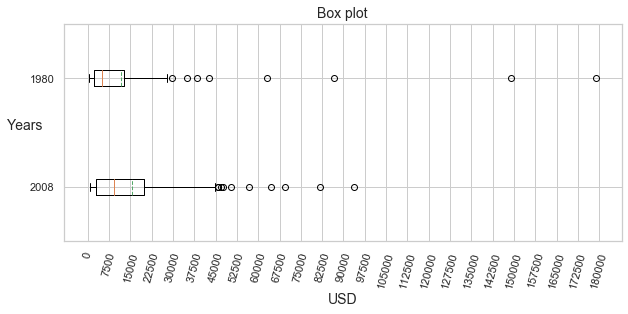

In [63]:
func_hist_box('gdp', 'Distribution of GDP per Capita','USD', [0,185000,7500])

In [64]:
# Skewness of data in year 1980 for data in variable "gdp"

df_data_1980['gdp'].skew()

5.359375337447084

In [65]:
# Skewness of data in year 2008 for data in variable "gdp"

df_data_2008['gdp'].skew()

1.8095884864925904

* Year 1980:
    * Between 139 countries the aprox. 90 countries was with the lowest income between with aprox. 400 to 9000 USD.
Lowest income was 415 USD, and over 30000 USD we see few countries with extra high income up to maximum of 179000 USD. This countries we can identified as outliers. Outliers are data points that differ significantly from other observations.<br/>  
  
  
* Year 2008:
    * The aprox 50 countries was with lowest income between with aprox. 800 to 5000 USD.  
Lowest income was 815 USD, and highest was 93600. After income value of 45000 USD are also in this year few outliers.  
  

* The histograms have skewness of data in: 
    * year 1980: 5,35 (right-skew - positive skewness)
    * year 2008: 1,80 (right-skew - positive skewness)
   
   
* This data doesn't have a normal distribution and mean and median are distant one each other.
For the year 1980, midle 50% of all points(IQR - Inter Quortal Range) are countries with income in the range from 2215 USD to 12900 USD.
For the year 2008 IQR are bigger in the front of the year 1980, incomes are in the range from 2905 USD to 19700 USD.  
The middle 50% of all countries have progressed from 1980 to 2008.  
  

* Countries in 2008 had on average, more income than in 1980, and this is evident from the mean and median.
In the year 1980, the median was 5.050 USD and mean 11.785 USD, and in the year 2008, the median was  9.160 USD and mean 15.694 
By this statiscics we can determent that in world was progres in GDP per capita.
___

,country_1980,region_1980,gdp_1980,country_2008,region_2008,gdp_2008
0,United Arab Emirates,asia,179000,Kuwait,asia,93600
1,Brunei,asia,149000,Brunei,asia,81900
2,Kuwait,asia,86600,United Arab Emirates,asia,69400
3,Saudi Arabia,asia,63000,Norway,europe,64600
4,Switzerland,europe,42700,Switzerland,europe,56800
5,Norway,europe,38400,United States,americas,50400
6,Iraq,asia,34900,Netherlands,europe,47700
7,United States,americas,29500,Saudi Arabia,asia,46800
8,Germany,europe,28000,Denmark,europe,45900
9,Bahamas,americas,27700,Ireland,europe,45700


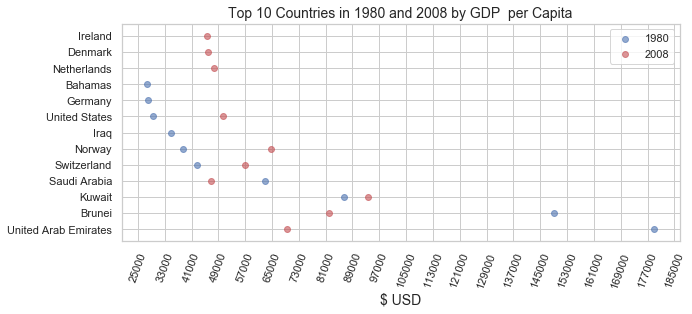

In [66]:
# Top 10 countries with highest GDP per capita

func_top10('gdp', 'Top 10 Countries in 1980 and 2008 by GDP  per Capita', '$ USD', [25000,185001,8000])

* The top three places in 1980 with the highest GDP per capita had in Asian countries, the United Arab Emirates, Brunei, and Kuwait, and those countries also had the top three places in 2008.
___

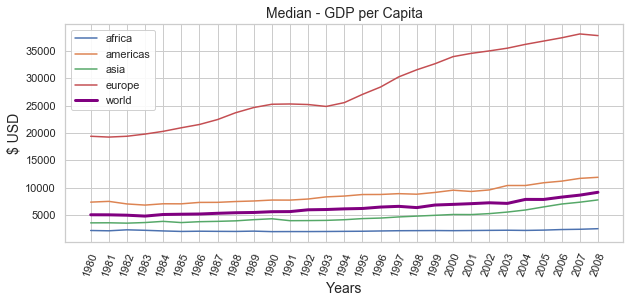

In [67]:
# Lineplot for income per regions from 1980 to 2008

func_range_plot('gdp','GDP per Capita', '$ USD', 'median')

* This graph is a representation of median income for four regions of the world.  
Africa is the poorest region with the least progress of GDP per capita.  
Asia has higher progress after 2001, and America's income rises mostly all range of time but slowly.  
Europe is the richest region with high progress through some stagnations in the observed period.
___

<a id='life'></a>
#### Inspection of the dataset: Life expectancy (years)
> *From the graph it is clear that the average global life expectancy is continuously increasing. Island had in both the observed years the highest life expectancy, while in the year 1980 was in Cambodia life expectancy of only 25.1 years.*

In [68]:
# Statistics for variable 'life' in years 1980 and 2008

df_data_1980['life'].describe(), df_data_2008['life'].describe()

(count    139.000000
 mean      58.675540
 std       10.177425
 min       25.100000
 25%       51.700000
 50%       59.700000
 75%       66.750000
 max       73.800000
 Name: life, dtype: float64,
 count    139.000000
 mean      66.681295
 std        9.080466
 min       44.800000
 25%       60.000000
 50%       69.400000
 75%       73.350000
 max       79.700000
 Name: life, dtype: float64)

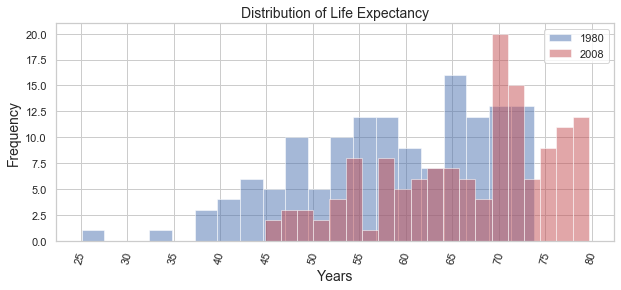

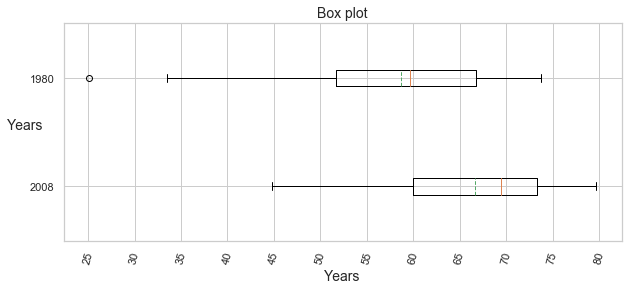

In [69]:
 func_hist_box('life', 'Distribution of Life Expectancy','Years', [25,81,5])

In [70]:
# Outlier in year 2008

df_data_1980.loc[df_data_1980['life'].idxmin(),:]

country    Cambodia
year           1980
gdp             811
life           25.1
kcal           1680
sbpm            119
sbpw            113
bmi            19.7
region         asia
Name: 551, dtype: object

In [71]:
# Skewness of data in year 1980 for data in variable "life"

df_data_1980['life'].skew()

-0.5503951540051961

In [72]:
# Skewness of data in year 2008 for data in variable "life"

df_data_2008['life'].skew()

-0.5589945036942061

* Year 1980:
    * The most common life expectancy was around 65 years. In this data we have one outlier with 25,1 life expectancy and this is for Cambodia. IQR is 15,07 years.
  
  
* Year 2008:   
    * In the year 2008, the most common life expectancy was around 70 years, and it is present in 20 countries. The lowest and the highest life expectancy are 44,8 and 73,35 years. IQR is 13,35
  
  
* The histograms have skewness of data in: 
    * year 1980: -0,550 (left-skew - negative skewness)
    * year 2008: -0,558 (left-skew - negative skewness) 
 
  
* IQR is lower in 2008 than in 1980, which tells us that 50% of data around mean are more concentrated than in 1980. In 29 years of the observed period we have an increasing average life expectancy in the world, from 58.67 to 66,68 years. People in 2008 live longer what we can see also from graphs. 

* From the graphs above we can say that the people in the world had a higher incomes in the year 2008.
___

,country_1980,region_1980,life_1980,country_2008,region_2008,life_2008
0,Iceland,europe,73.8,Iceland,europe,79.7
1,Japan,asia,73.5,Switzerland,europe,79.4
2,Sweden,europe,72.9,Japan,asia,79.3
3,Cyprus,europe,72.8,Australia,asia,79.3
4,Norway,europe,72.5,Israel,asia,79.1
5,Netherlands,europe,72.4,Sweden,europe,79.1
6,Israel,asia,72.3,Italy,europe,78.9
7,Switzerland,europe,72.3,Canada,americas,78.6
8,Spain,europe,72.2,New Zealand,asia,78.4
9,Cuba,americas,72.2,Norway,europe,78.4


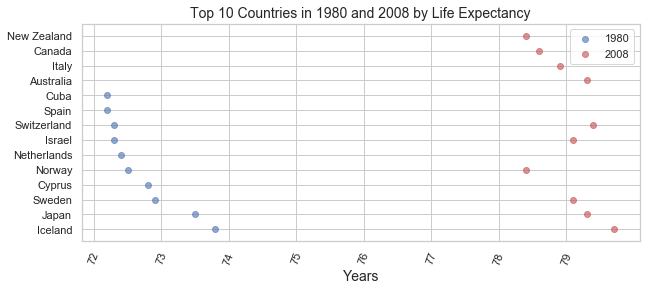

In [73]:
# Top 10 countries with highest GDP per capita 

func_top10('life', 'Top 10 Countries in 1980 and 2008 by Life Expectancy', 'Years', [72,80,1])

* Seven countries in the top 10 places in 1980 are from Europe, and just two are from Asia.  
From the first 10 places in 2008, 5 countries are from Europe and 4 from Asia.  
In the years 1980 and  2008 the highest life expectancy was in Iceland and has increased for 5,9 years, from 73,8 years to 79,7 years.
___

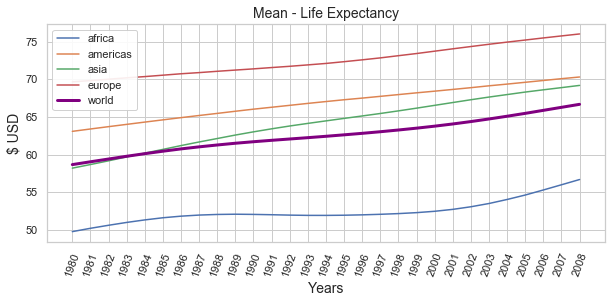

In [74]:
# Lineplot for life expectan per regions from 1980 to 2008

func_range_plot('life','Life Expectancy', '$ USD', 'mean')

* On this graph is a preview of mean life expectancy for world regions.  
In the year 2008 for most people in the world a life expectancy was around 70 years but in Europe was an average of 76 years and in Africa only 57 years.  
Europe, the Americas, and Asia have the same trend and it is always positive in the observed range, but for Africa, it is significant that from around the year 2000 life expectancy starts to increase with a higher rate.
___

<a id='kcal'></a>
#### Inspection of the dataset: Food intake energy in calories (kcal)
> *The world trend is increasing calorie intake from 1980 to 2008, with a higher jump in the year 1993. From that year Asia, the Americas, and Africa had a visible increase in calorie intake.*

In [75]:
# Statistics for variable 'kcal' in years 1980 and 2008

df_data_1980['kcal'].describe(), df_data_2008['kcal'].describe()

(count     139.00000
 mean     2510.57554
 std       507.40712
 min      1440.00000
 25%      2130.00000
 50%      2430.00000
 75%      2905.00000
 max      3600.00000
 Name: kcal, dtype: float64,
 count     139.000000
 mean     2744.460432
 std       462.333672
 min      1800.000000
 25%      2385.000000
 50%      2660.000000
 75%      3125.000000
 max      3720.000000
 Name: kcal, dtype: float64)

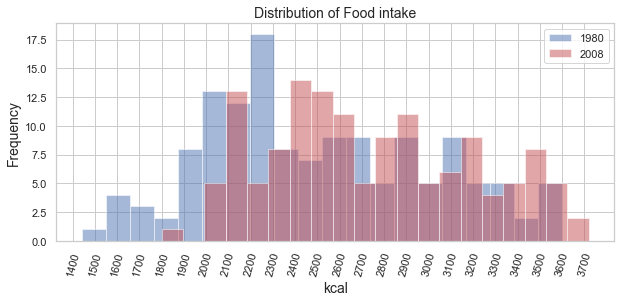

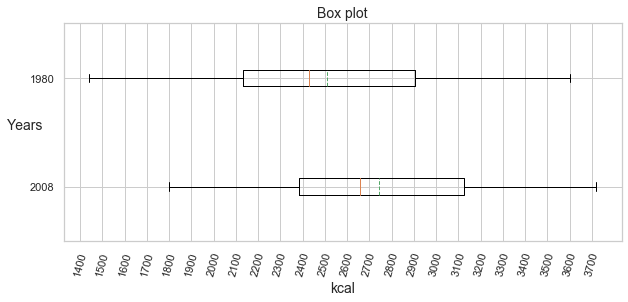

In [76]:
 func_hist_box('kcal', 'Distribution of Food intake','kcal', [1400,3800,100])

In [77]:
# Skewness of data in year 1980 for data in variable "kcal"

df_data_1980['kcal'].skew()

0.2921974685581857

In [78]:
# Skewness of data in year 2008 for data in variable "kcal"

df_data_2008['kcal'].skew()

0.28095230096457735

* Year 1980:
    * The most common food intake in the world was between 2200 to 2300 kcal, with a mean of 2510 kcal and a standard deviation od 507 kcal. The lowest food intake was 1440 and the highest 3600 kcal, and the range is 2160 kcal. IQR was  775 kcal.
    In statistics, the range is a measure of spread: it’s the difference between the highest value and the lowest value in a data set.
  
  
* Year 2008:   
    * In the year 2008, most food intakes were between 2370 to 2470 kcal. The lowest and highest food intake was 1800 and 3720 kcal. The range was 1920 and IQR was 740.
  
  
* The histograms have skewness of data in: 
    * year 1980: 0,292 (right-skew - positive skewness)
    * year 2008: 0,280 (right-skew - positive skewness) 
* Data have distribution very near to normal distributions.  

 
* Complete distribution shifted to higher values in year 2008.  
Comparison of range from these two years shows us that in the world 2008  were fewer differences between countries with the smallest and biggest food intake than in 1980. The difference in IQR is not so big for central 50% of data in both years.
___

,country_1980,region_1980,kcal_1980,country_2008,region_2008,kcal_2008
0,Italy,europe,3600,Austria,europe,3720
1,Bulgaria,europe,3590,United States,americas,3700
2,Poland,europe,3580,Italy,europe,3600
3,Ireland,europe,3580,Turkey,europe,3600
4,Switzerland,europe,3510,Ireland,europe,3580
5,Turkey,europe,3450,France,europe,3550
6,United Arab Emirates,asia,3390,Portugal,europe,3540
7,Hungary,europe,3380,Germany,europe,3520
8,France,europe,3380,Greece,europe,3520
9,Austria,europe,3360,Israel,asia,3520


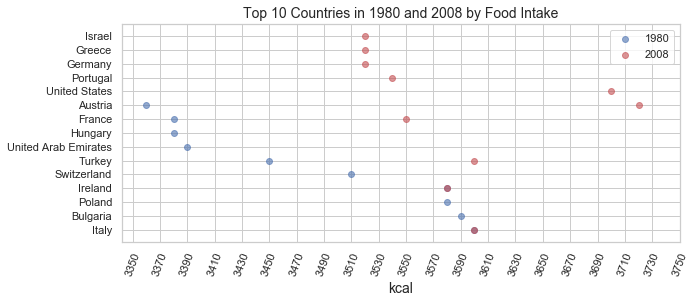

In [79]:
# Top 10 countries with highest food intake 

func_top10('kcal', 'Top 10 Countries in 1980 and 2008 by Food Intake', 'kcal', [3350,3751,20])

* Upper scatter plot and table give us information that countries with most food intake are in Europe. Italy and Austria was countries with the highest calorie intake in years 1980 and 2008.
___

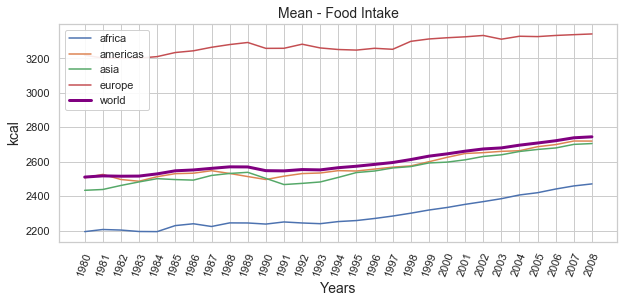

In [80]:
# Lineplot for life expectan per regions from 1980 to 2008

func_range_plot('kcal','Food Intake', 'kcal', 'mean')

* On this graph is a preview of mean food intake per world regions.  
  In Europe people consume food with the highest calorie value. In the middle of the graph are Asia and the Americas, and on the bottom is Africa with lowest calorie intake.  
In 1993, calorie intake began to increase at a higher rate in Africa. Asia and the Americas increas more or less at same rate. Slope for Asia, Africa, and the Americas are from 1993 to 2008 mostly the same.
Europe has some fluctuations in food intake but the trend is positive.
___

<a id='sbpm'></a>
#### Inspection of the dataset: SBP by men (mmHg)

In [81]:
# Statistics for variable 'sbpm' in years 1980 and 2008

df_data_1980['sbpm'].describe(), df_data_2008['sbpm'].describe()

(count    139.000000
 mean     132.021583
 std        4.787465
 min      119.000000
 25%      129.000000
 50%      132.000000
 75%      135.000000
 max      143.000000
 Name: sbpm, dtype: float64,
 count    139.000000
 mean     130.640288
 std        3.516024
 min      123.000000
 25%      128.000000
 50%      131.000000
 75%      133.000000
 max      139.000000
 Name: sbpm, dtype: float64)

In [82]:
# Statistics for variable 'sbpm' in years 1980 and 2008

df_data.loc[df_data_1980['sbpm'].idxmin()]

country    Cambodia
year           1980
gdp             811
life           25.1
kcal           1680
sbpm            119
sbpw            113
bmi            19.7
region         asia
Name: 551, dtype: object

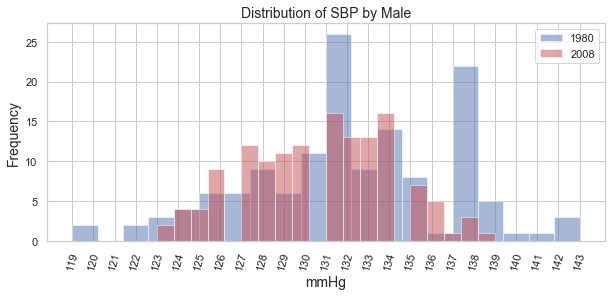

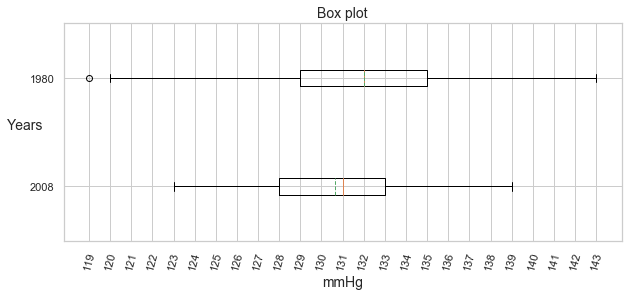

In [83]:
 func_hist_box('sbpm', 'Distribution of SBP by Male','mmHg', [119,144,1])

In [84]:
# Skewness of data in year 1980 for data in variable "sbpm"

df_data_1980['sbpm'].skew()

-0.2382512195727268

In [85]:
# Skewness of data in year 2008 for data in variable "sbpm"

df_data_2008['sbpm'].skew()

-0.05015285046258433

* Year 1980:
    * The most common Systolic Blood Pressure by Male was between 131.0 to 132.1 mmHg, with a mean and median of 132 mmHg and a standard deviation of 4,78 mmHg. The lowest SBP by Male was 119 in Cambodia and we consider this point as an outlier. The range is 24 mmHg and IQR is 6 mmHg.  
  
* Year 2008:   
    * In the year 2008, the most common SBP by Male was in two peaks, between 131.0 to 131.8 mmHg and between 133.5 to 134.3, with a mean 130.6 and median of 131 mmHg and a standard deviation of 3.51 mmHg. In the year are no outliers. The range is 16 mmHg and IQR is 5 mmHg.  
  
  
* The histograms have skewness of data in: 
    * year 1980: -0,238 (left-skew - negative skewness)
    * year 2008: -0,051 (left-skew - negative skewness) 
* Data have distribution very near to normal distributions, specialy data for year 2008.  

* Comparison of range and IQR shows us that in the year 2008 the range of SBP in the world is smaller and with a tendency to the normal distribution.
___

<a id='q1'></a>
#### Question 1.
### What 10 countries have the highest SBP by men?

,country_1980,region_1980,sbpm_1980,country_2008,region_2008,sbpm_2008
0,Finland,europe,143,Niger,africa,139
1,Norway,europe,142,Sao Tome and Principe,africa,138
2,Gabon,africa,142,Mozambique,africa,138
3,Niger,africa,141,Cape Verde,africa,138
4,Germany,europe,140,Mongolia,asia,137
5,Sao Tome and Principe,africa,139,Malawi,africa,136
6,Netherlands,europe,139,Namibia,africa,136
7,Sweden,europe,139,Uganda,africa,136
8,France,europe,139,Hungary,europe,136
9,Ireland,europe,139,Rwanda,africa,136


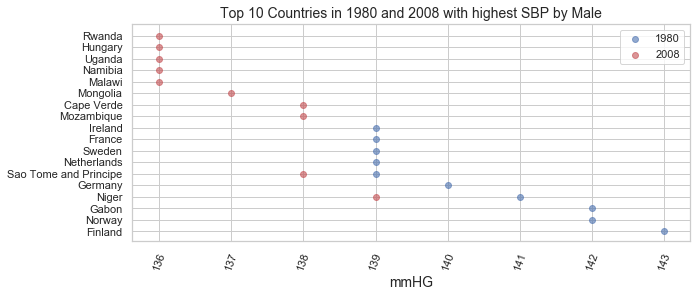

In [86]:
# Top 10 countries with highest SBP by male 

func_top10('sbpm', 'Top 10 Countries in 1980 and 2008 with highest SBP by Male', 'mmHG', [136,144,1])

* Upper scatter plot and table give us information that in the year 1980 the highest SBP by men was 143 in Finland and this is reduced until 2008 with the highest SBP of 139 mmHg in Niger. Because of this, we must look at least what is the trend of the first 10 countries with higher SBP by men.
___

#### Answer 1
* In 1980 the top 10 countries with the highest SBP by men are: 'Finland', 'Gabon', 'Norway', 'Niger', 'Germany', 'Sao Tome and Principe', France', 'Sweden', 'Netherlands' and 'Ireland'.  
From 10 countries 7 are from Europe and 3 from Africa.
<br/>  <br/>  
* In 2008 countries with highest SBP by men are: 'Niger', 'Mozambique', 'Cape Verde', 'Sao Tome and Principe', 'Mongolia', Uganda', 'Malawi', 'Rwanda', 'Namibia' and 'Hungary'.  
For that year we see that most countries with higher SBP are from Africa, and just one from Europe, and one from Asia.
<br/>  <br/>  
* We see that in the first 10 countries, according to the level of the SBP, the order in the leading region changed, in 1980 it was Europe, and in 2008 it was Africa.
---

<a id='q2'></a>
#### Question 2.
### In what regions of the world is the highest systolic blood pressure (SBP) by men and women respectively?

In [87]:
# Display of the mean values per regions for SBP by men and women in year 1980

pd.set_option('precision',2)  # the precision of SBP value
sbpm_regions = df_data.groupby(['region','year']).mean()

pd.concat([sbpm_regions.query('year == 1980')['sbpm'].sort_values(ascending = False).reset_index(), 
           sbpm_regions.query('year == 1980')['sbpw'].sort_values(ascending = False).reset_index()],axis=1)

,region,year,sbpm,region,year,sbpw
0,europe,1980,137.08,europe,1980,133.25
1,africa,1980,132.89,africa,1980,128.14
2,americas,1980,131.33,americas,1980,126.52
3,asia,1980,128.42,asia,1980,124.32


In [88]:
# Display of the mean values per regions for SBP by men and women in year 2008

pd.concat([sbpm_regions.query('year == 2008')['sbpm'].sort_values(ascending = False).reset_index(), 
           sbpm_regions.query('year == 2008')['sbpw'].sort_values(ascending = False).reset_index()],axis=1)

,region,year,sbpm,region,year,sbpw
0,africa,2008,133.23,africa,2008,131.25
1,europe,2008,132.04,europe,2008,124.50
2,americas,2008,129.73,asia,2008,123.66
3,asia,2008,127.55,americas,2008,123.36


#### Answer 2
* Of all the regions in **1980**, **Europe** had the highest average SBP for men with 137.08 mmHg and women 133.25 mmHg.  
In the year **2008** region with the highest SBP for men was **Africa** with 133.22 mmHg and for women also Africa with 131.25 mmHg.
___

<a id='q3'></a>
#### Question 3.
### How did SBP by men in the world regions change over time by region?

In [89]:
# Minimum SBP by male for world regions from 1980 to 2008

sbpm_regions = df_data.groupby(['region','year']).mean()['sbpm']
pd.concat([sbpm_regions.groupby('region').idxmin(), 
           sbpm_regions.groupby('region').min(),
           sbpm_regions.groupby('region').idxmax(),
           sbpm_regions.groupby('region').max()], axis=1, keys=['min_year', 'min_avg_value', 'max_year','max_avg_value'])

,min_year,min_avg_value,max_year,max_avg_value
region,,,,
africa,"(africa, 1995)",130.61,"(africa, 2008)",133.23
americas,"(americas, 1997)",128.03,"(americas, 1980)",131.33
asia,"(asia, 1996)",126.66,"(asia, 1980)",128.42
europe,"(europe, 2008)",132.04,"(europe, 1980)",137.08


In [90]:
# Mean SBP by male and women for world regions in 1980 and 2008

sbpm_regions = df_data.groupby(['year','region']).mean().loc[[1980,2008],['sbpm', 'sbpw']]

pd.concat ([df_data.groupby(['year','region']).mean().loc[[1980],['sbpm', 'sbpw']].reset_index(),
            df_data.groupby(['year','region']).mean().loc[[2008],['sbpm', 'sbpw']].reset_index()], axis=1)

,year,region,sbpm,sbpw,year,region,sbpm,sbpw
0,1980,africa,132.89,128.14,2008,africa,133.23,131.25
1,1980,americas,131.33,126.52,2008,americas,129.73,123.36
2,1980,asia,128.42,124.32,2008,asia,127.55,123.66
3,1980,europe,137.08,133.25,2008,europe,132.04,124.50


In [91]:
# mean of SBP my male for last 9 years for Africa

sbpm_last_9 = df_data.groupby(['region','year']).mean().loc[('africa',slice(2000,2008)),:]['sbpm']
sbpm_last_9

region  year
africa  2000    130.95
        2001    131.20
        2002    131.50
        2003    131.73
        2004    132.09
        2005    132.30
        2006    132.52
        2007    132.86
        2008    133.23
Name: sbpm, dtype: float64

In [92]:
# differences between max and min (range for 9 years) of mean SBP for last 9 years

sbpm_last_9.max()-sbpm_last_9.min()

2.272727272727252

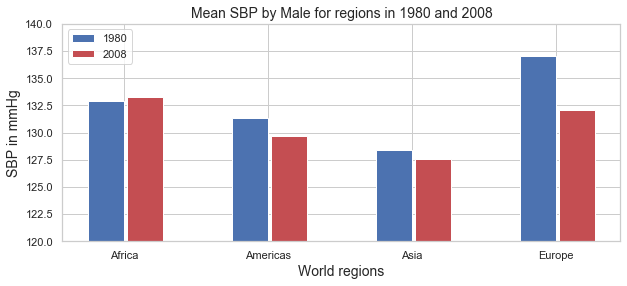

In [93]:
tick_label = sbpm_regions.loc[1980,'sbpm'].index.to_list()
tick_label = list(map(lambda x: x.title(), tick_label))
idx = np.arange(0, len(tick_label))
height_1980 = sbpm_regions.loc[1980,'sbpm']
height_2008 = sbpm_regions.loc[2008,'sbpm']
width = 0.25

#bar plot
plt.figure(figsize=(10,4))
plt.bar(x = idx, height = height_1980, width = width, tick_label = tick_label, color = 'b', label='1980')
plt.bar(x = idx+0.27, height = height_2008, width = width, tick_label = tick_label, color = 'r', label='2008')

plt.title('Mean SBP by Male for regions in 1980 and 2008', fontsize = 14)
plt.xticks(idx + width/2)
plt.xlabel('World regions', fontsize = 14)
plt.ylabel('SBP in mmHg', fontsize = 14)
plt.ylim([120,140])
plt.legend(loc=2)
plt.show()

* Only Africa has an increase in SBP in men, and America, Asia and Europe decreased values from 1980 to 2008. Europe reduced SBP the most.  
___

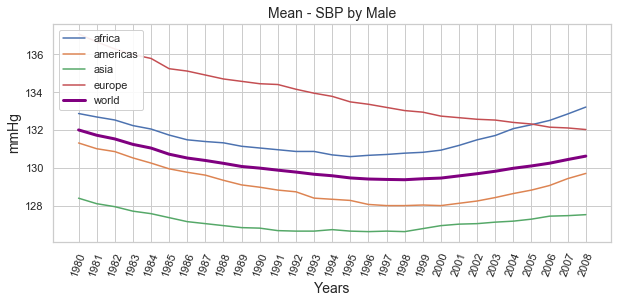

In [94]:
# Lineplot for life expectancy per regions from 1980 to 2008

func_range_plot('sbpm','SBP by Male', 'mmHg', 'mean')

#### Answer 3
* In the line plot the world average SBP we see that SBP first falls and then begins to rise. The change in trend began in 1998. The SBP trend then begins to change from negative to positive.
The highest value in all regions was in 1980 except in Africa where the highest value was in 2008.
  
  
* Europe:  
In European countries alone, the SBP decreased in time observation by 5.04 mmHg, from 137.08 to 132.04 and the trend is negative all the time. The minimum value of SBP was in 2008 with 132.04 mmHg.
  
  
* Asia:  
Asia has the lowest SBP average at all the time, with a difference between 2008 and 1980 of -0.87 mmHg. There has been a declining trend since 1980, but after 1998 the trend changed and became slightly positive.
The lowest value was 126.65 mmHg in 1996.
  
  
* The Americas:  
The difference in SBP between 2008 and 1980 is -1.61 mmHg. The trend line is declining until 2000 when it starts to grow again at a slightly higher rate. In 1997, the lowest SBP value was 128.03 mmHg.
  
  
* Africa:  
When we look at the beginning and end of the observed period, we see that only Africa has an increase in SBP, by 0.34 mmHg.
This is worrying because the line plot shows that the trend in Africa has been extremely positive for the last 9 years. In 9 years SBP increased by 2.27 mmHg, and the lowest average value was in 1995 with 130.61 mmHg.
___

<a id='life'></a>
#### Inspection of the dataset: SBP by women (mmHg)

In [95]:
# Statistics for variable 'sbpw' in years 1980 and 2008

df_data_1980['sbpw'].describe(), df_data_2008['sbpw'].describe()

(count    139.00
 mean     127.59
 std        4.90
 min      113.00
 25%      125.00
 50%      128.00
 75%      131.00
 max      139.00
 Name: sbpw, dtype: float64,
 count    139.00
 mean     126.14
 std        4.49
 min      117.00
 25%      123.00
 50%      125.00
 75%      130.00
 max      136.00
 Name: sbpw, dtype: float64)

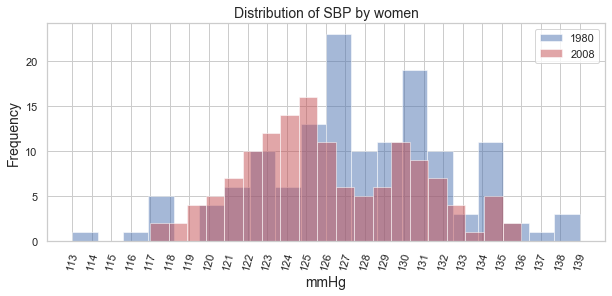

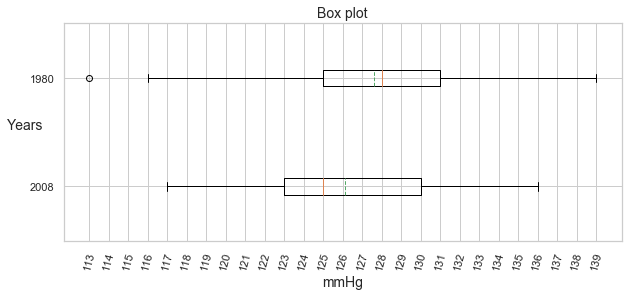

In [96]:
 func_hist_box('sbpw', 'Distribution of SBP by women','mmHg', [113,140,1])

In [97]:
# Skewness of data in year 1980 for data in variable "sbpw"

df_data_1980['sbpw'].skew()

-0.18769112395282153

In [98]:
# Skewness of data in year 2008 for data in variable "sbpw"

df_data_2008['sbpw'].skew()

0.24752267059997612

* Year 1980:
    * The most common SBP by a women was between 126.0 to 127.2 mmHg, with a mean of 127.58 mmHg and a standard deviation od 4.90 mmHg. The lowest SBP was 113 and the highest 139 mmHg, and the range is 26 kcal. IQR was  6 kcal. In this data we see one outlier with a value of 113 mmHg.
  
  
* Year 2008:   
    * In the year 2008, most SBP by a women was between 124.7 to 125.5 mmHg. The lowest and highest SBP was 117 and 136 mmHg. The range was 19 and IQR was 7.
  
  
* The histograms have skewness of data in: 
    * year 1980: -0,187 (left-skew - negative skewness)
    * year 2008:  0,247 (right-skew - positive skewness)
* Data have distribution very near to normal distributions.  

 
* Comparison of range from these two years shows us that in 2008 are more concentrated data. The IQR in 2008 is a little bit broader than in 1980.
___

,country_1980,region_1980,sbpw_1980,country_2008,region_2008,sbpw_2008
0,Gabon,africa,139,Nigeria,africa,136
1,Poland,europe,138,Sao Tome and Principe,africa,136
2,Finland,europe,138,Niger,africa,135
3,Norway,europe,137,Sierra Leone,africa,135
4,Bulgaria,europe,136,Rwanda,africa,135
5,Kuwait,asia,136,Uganda,africa,135
6,Hungary,europe,135,Mozambique,africa,135
7,Saudi Arabia,asia,135,Malawi,africa,134
8,Germany,europe,135,Botswana,africa,133
9,Portugal,europe,135,Cape Verde,africa,133


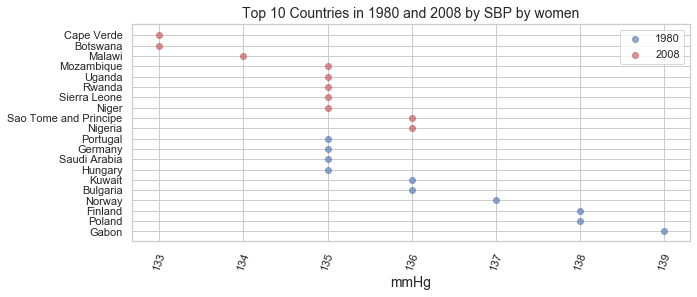

In [99]:
# Top 10 countries with SBP by women 

func_top10('sbpw', 'Top 10 Countries in 1980 and 2008 by SBP by women', 'mmHg', [133,140,1])

* In the year 1980 countries with most highest SBP are from Europe, but in 2008 all top 10 countries with highest SBP by women are from Africa.
___

In [100]:
# Minimum SBP by women for world regions from 1980 to 2008

sbpm_regions = df_data.groupby(['region','year']).mean()['sbpw']
pd.concat([sbpm_regions.groupby('region').idxmin(), 
           sbpm_regions.groupby('region').min(),
           sbpm_regions.groupby('region').idxmax(),
           sbpm_regions.groupby('region').max()], axis=1, keys=['min_year', 'min_avg_value', 'max_year','max_avg_value'])

,min_year,min_avg_value,max_year,max_avg_value
region,,,,
africa,"(africa, 1980)",128.14,"(africa, 2008)",131.25
americas,"(americas, 2008)",123.36,"(americas, 1980)",126.52
asia,"(asia, 2008)",123.66,"(asia, 1981)",124.37
europe,"(europe, 2008)",124.50,"(europe, 1980)",133.25


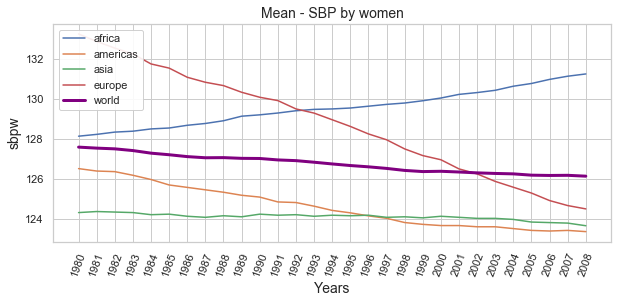

In [101]:
# Lineplot for SBP by women per regions from 1980 to 2008

func_range_plot('sbpw','SBP by women', 'sbpw', 'mean')

* On this graph is a preview of SBP by women per world regions. SBP is lightly decreasing, but thanks to Europe and the Americas.  
Europe is drastically reduced SBP in the observed period for 8,75 mmHg and the Americas are also reduced. In Asia is SBP more or less in the same range. On the other hand in Africa is SBP increased for 3,12 mmHg from 128,13 to 131,25 mmHg.
___

<a id='bmi'></a>
#### Inspection of the dataset: Body Mass Index BMI by men (BMI)

In [102]:
# Statistics for variable 'bmi' in years 1980 and 2008

df_data_1980['bmi'].describe(), df_data_2008['bmi'].describe()

(count    139.00
 mean      22.75
 std        1.89
 min       19.00
 25%       21.05
 50%       22.90
 75%       24.60
 max       25.80
 Name: bmi, dtype: float64,
 count    139.00
 mean      24.62
 std        2.38
 min       20.40
 25%       22.40
 50%       25.10
 75%       26.70
 max       30.40
 Name: bmi, dtype: float64)

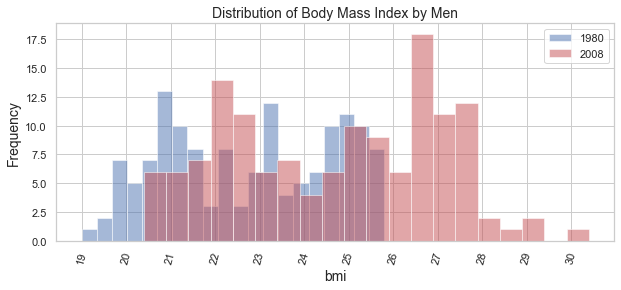

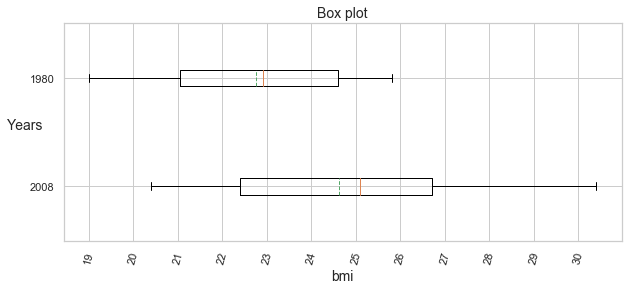

In [103]:
 func_hist_box('bmi', 'Distribution of Body Mass Index by Men','bmi', [19,31,1])

In [104]:
# Skewness of data in year 1980 for data in variable "bmi"

df_data_1980['bmi'].skew()

-0.03195065679251938

In [105]:
# Skewness of data in year 2008 for data in variable "bmi"

df_data_2008['bmi'].skew()

-0.04824534377815507

* Year 1980:
    * The most common BMI by men was between 20.7 to 21.04 BMI with 13 countries in this range with a mean 22.74 and a standard deviation od 1.88. The lowest BMI was 19.0 and the highest at 25.8. The range was 6.8, and IQR was 3.55 BMI.   
  
  
* Year 2008:   
    * In the year 2008, most BMI by men was between 26.4 to 26.9. The lowest and highest value was 20.4 and 30.4. The range was 10 and IQR was 4,3 of BMI.
  
  
* The histograms have a skewness of data in: 
    * year 1980: -0,031 (left-skew - negative skewness)
    * year 2008: -0,048 (left-skew - negative skewness)
* Data have bimodal distribution for both years, which tells us that especially in 2008 are countries mostly concentrated around 22.0 BMI and 26.5 BMI.

 
* Mean has been moved from 22.74 in 1980 to 24.62 BMI in 2008, and BMI for all countries is generally higher in 2008.
A comparison of the range from these two years shows us that in 2008 BMI has a wider spread.
___

,country_1980,region_1980,bmi_1980,country_2008,region_2008,bmi_2008
0,Ireland,europe,25.8,Samoa,asia,30.4
1,Samoa,asia,25.8,Kuwait,asia,29.2
2,Malta,europe,25.7,Kiribati,asia,29.2
3,United States,americas,25.5,United States,americas,28.5
4,Kiribati,asia,25.5,United Arab Emirates,asia,28.1
5,Kuwait,asia,25.5,Saudi Arabia,asia,27.9
6,Germany,europe,25.5,New Zealand,asia,27.8
7,Finland,europe,25.5,Malta,europe,27.7
8,Italy,europe,25.4,Australia,asia,27.6
9,Argentina,americas,25.4,Ireland,europe,27.6


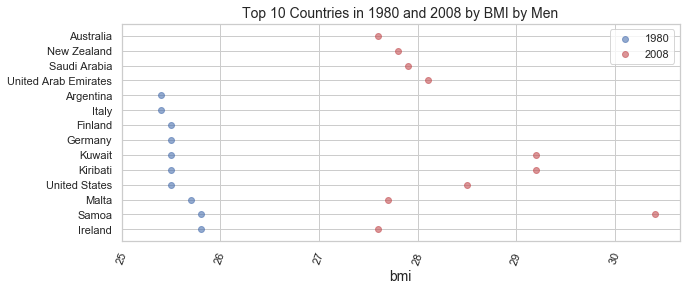

In [106]:
# Top 10 countries with the highest BMI by Men

func_top10('bmi', 'Top 10 Countries in 1980 and 2008 by BMI by Men', 'bmi', [25,31,1])

* In the year 1980 countries with most highest BMI are from Europe, but in 2008 top 10 countries with the highest BMI is from Asia. Samoa, Kiribati, Kuwait, and the United States are countries with the highest BMI by men in 2008. 
___

In [107]:
# percentage of countries with higher BMI in 2008 compared to 1980

df_data.query('bmi > 25.8 and year == 2008')['country'].count() / df_data['country'].nunique() * 100

38.1294964028777

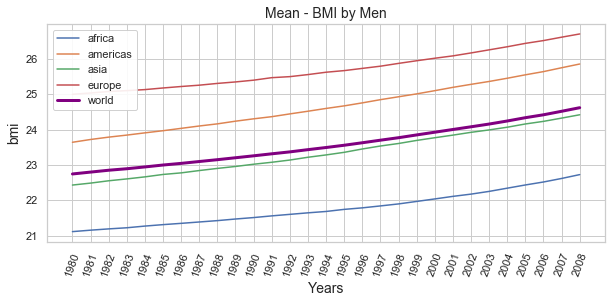

In [108]:
# Lineplot for SBP by women per regions from 1980 to 2008

func_range_plot('bmi','BMI by Men', 'bmi', 'mean')

* On the line plot for world and regions we see that from 1980 to 2008 is an upward trend in BMI for the men.  
The tendency of the men population is in the direction to obesity. At the year 2008 mean of world BMI was 24.62 and from 25 of BMI, it's calculated as overweighted population. Samoa has an obese population with an average BMI of 30.4 in the year 2008.
The highest BMI in the year 1980 was 25.80, and in the year 2008 are more than 38.12% of countries with higher BMI.
___

<a id='insp_rel'></a>
### Inspection of relationship between variables separately


<a id='q4'></a>
#### Question 4.
### What are factors that could affect the change in blood pressure by men?

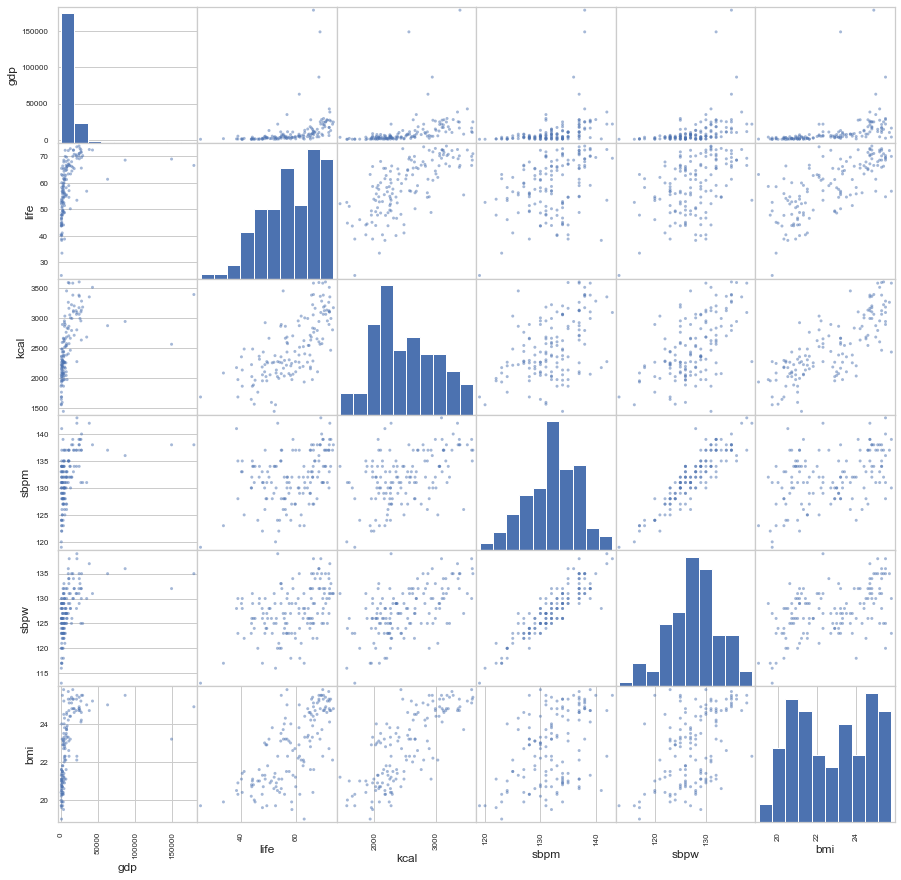

In [109]:
# Plot of Scatter matrix for all variable in year 1980

pd.plotting.scatter_matrix(df_data.query('year == 1980').iloc[:,2:-1] ,figsize=(15,15));

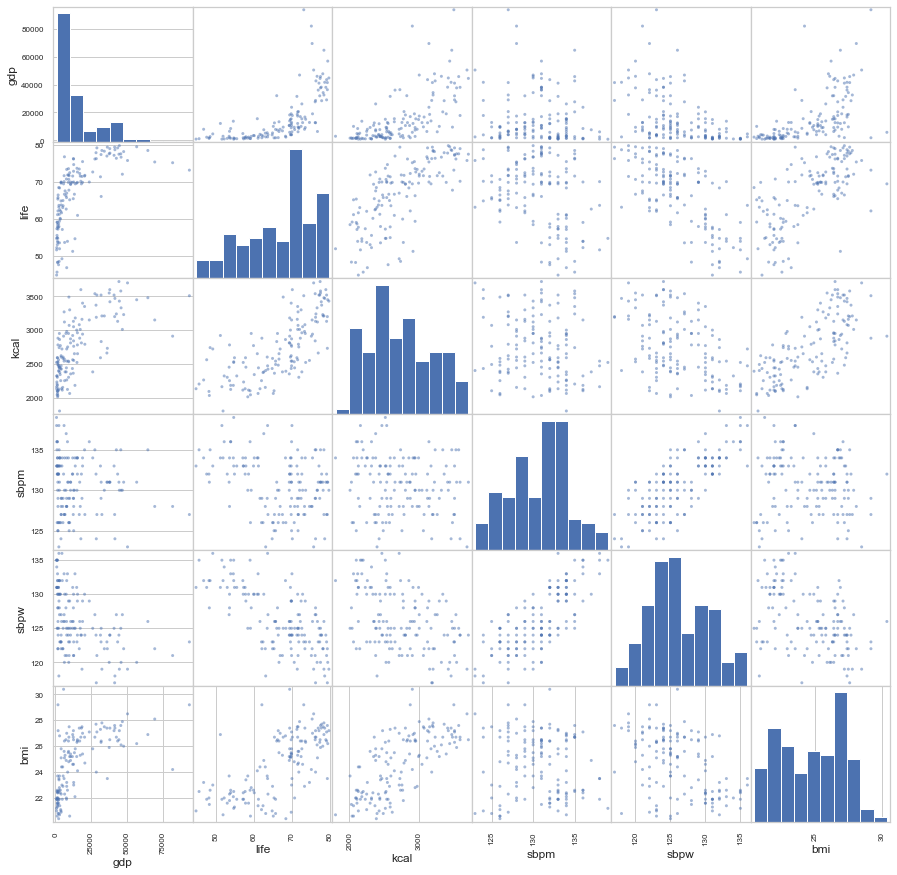

In [110]:
# Plot of Scatter matrix for all variable in year 2008

pd.plotting.scatter_matrix(df_data.query('year == 2008').iloc[:,2:-1] ,figsize=(15,15));

* On upper graphs we see how variables are correlated to each to other, and for each variable we see a histogram
___

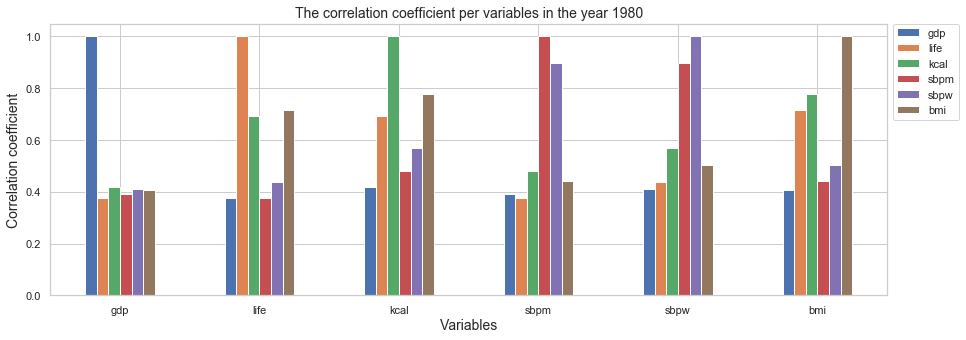

In [111]:
df_data.query('year == 1980').corr().iloc[1:,1:].plot(kind='bar', figsize=(15,5))
plt.title('The correlation coefficient per variables in the year 1980', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Correlation coefficient', fontsize=14)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.02));

###### 1980: Overview of the correlation coefficient per variables in the year 1980
``gdp        | `` have a moderate positive correlation to all indicators  
``life       | `` have a strong positive correlation to kcal and bmi  
``kcal       | `` have a strong positive correlation to life and bmi  
``sbpm       | `` have a strong positive correlation to sbpw, and a moderate to all others indicators  
``sbpw       | `` have a strong positive correlation to sbpm  
``bmi        | `` have a strong positive life for life and kcal  
___

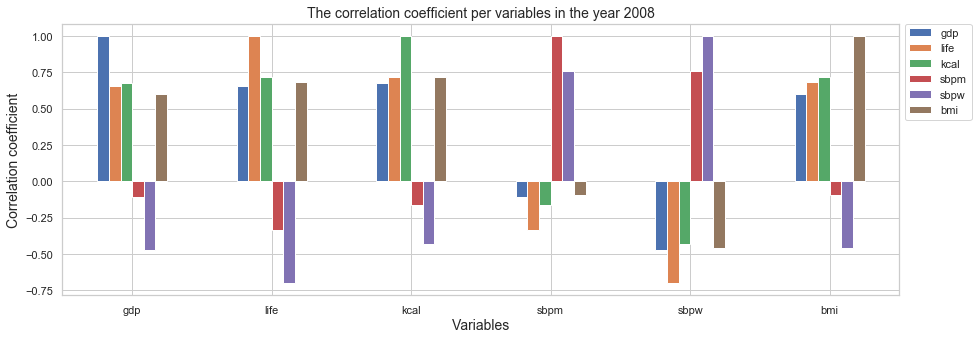

In [112]:
df_data.query('year == 2008').corr().iloc[1:,1:].plot(kind='bar', figsize=(15,5))
plt.title('The correlation coefficient per variables in the year 2008', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Correlation coefficient', fontsize=14)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.02));

###### 2008: Overview of the correlation coefficient per variables in the year 2008
``gdp        | `` have a week negative correlation to sbpm and a moderate negative to sbpw  
``life       | `` have a moderate positive correlation to kcal and gdp, but for sbpm is week negative and sbpw is a moderate negative  
``kcal       | `` have a strong positive correlation to life and bmi  
``sbpm       | `` have a strong positive correlation to sbpw, and all others indicators are week negative  
``sbpw       | `` have a strong positive correlation to sbpm, and life is strong negative. The gdp, kcal, and bmi are moderate negative   
``bmi        | `` have a moderate positive correlation to gdp, life and kcal. To sbpw is a moderate negative correlation  
___

In [113]:
# Pearson's correlation for world in 1980

df_data.query('year == 1980').corr().iloc[1:,1:].sort_values(by='sbpm',ascending = False)

,gdp,life,kcal,sbpm,sbpw,bmi
sbpm,0.39,0.37,0.48,1.00,0.90,0.44
sbpw,0.41,0.44,0.57,0.90,1.00,0.50
kcal,0.42,0.69,1.00,0.48,0.57,0.78
bmi,0.41,0.71,0.78,0.44,0.50,1.00
gdp,1.00,0.38,0.42,0.39,0.41,0.41
life,0.38,1.00,0.69,0.37,0.44,0.71


In [114]:
# Pearson's correlation for world in 2008

df_data.query('year == 2008').corr().iloc[1:,1:].sort_values(by='sbpm', ascending = False)

,gdp,life,kcal,sbpm,sbpw,bmi
sbpm,-0.11,-0.33,-0.16,1.00,0.76,-0.09
sbpw,-0.47,-0.70,-0.43,0.76,1.00,-0.46
bmi,0.60,0.68,0.72,-0.09,-0.46,1.00
gdp,1.00,0.66,0.68,-0.11,-0.47,0.60
kcal,0.68,0.72,1.00,-0.16,-0.43,0.72
life,0.66,1.00,0.72,-0.33,-0.70,0.68


 * SBP by men in 1980 has the highest correlation with SBP by women of r = 0.898977, and in 2008 that correlation was r = 0.755770. This is a strong positive linear correlation in both years of observation. It is possible two populations do not have causation on each other, but something else may affect both SBP by men and SBP by women.  
With all other indicators in the year 1980, the variable "sbpm" has a moderate positive correlation.  

* In the year 2008 is SBP by men with strong positive correlated to SBP by women, correlation coefficient r = 0.755770, and other indicators are negative. The only correlation with variable "life" is a bit higher r = -0.334556, but moderate negative. 
___

#### Answer 4
* We can say that in 1980, SBP in men may have been affected by indicators of BMI, GDP per capita, calorie intake, life expectancy, and SBP by women, but in 2008 the strong positive correlation have only SBP by women, while all other indicators have opposite moderate direction.
___

<a id='q5'></a>
#### Question 5.
### Is there a correlation between SBP of men's population and GDP per capita?

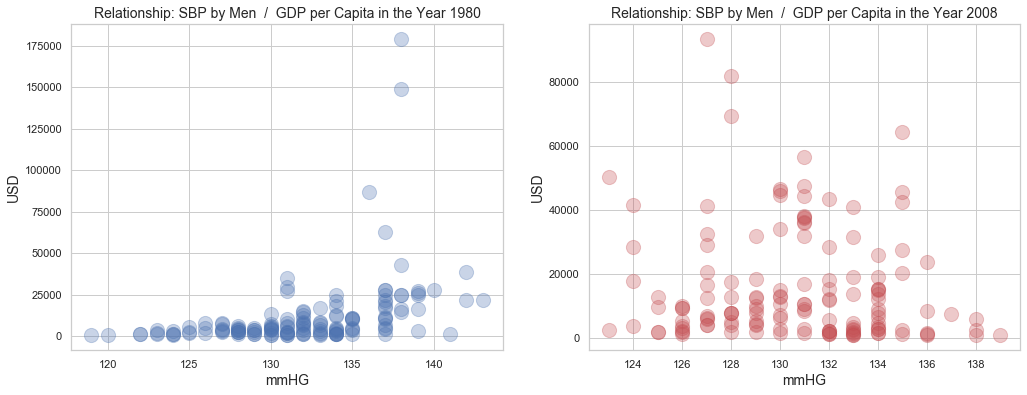

In [115]:
# Scatter plot

fig , ax = plt.subplots(1,2, figsize = (17,6))
ax[0].scatter(df_data.query("year=='1980'")['sbpm'], 
              df_data.query("year=='1980'")['gdp'], alpha=.3, s=200,c='b')
ax[0].set_title('Relationship: SBP by Men  /  GDP per Capita in the Year 1980', fontsize = 14)
ax[0].set_xlabel('mmHG', fontsize = 14)
ax[0].set_ylabel('USD', fontsize = 14)
# -------------------------------------------------------------------------------------------------------------------#
ax[1].scatter(df_data.query("year=='2008'")['sbpm'], 
            df_data.query("year=='2008'")['gdp'], alpha=.3, s=200,c='r')
ax[1].set_title('Relationship: SBP by Men  /  GDP per Capita in the Year 2008', fontsize = 14)
ax[1].set_xlabel('mmHG', fontsize = 14)
ax[1].set_ylabel('USD', fontsize = 14)
plt.show()

#### Answer 5:  
* 1980: We can conclude that in the year 1980 countries with a bigger income had also a higher SBP of men. The Pearsons correlation coefficient is 0.39, and this is a moderate positive linear correlation.  
  
  
* 2008: There are no positive or negative linear trends to be. In most countries, SPB by men is concentrated in the middle, from 125 to 135 mmHg where are countries with all range of income. That year was with a very small negative Pearson's correlation coefficient value of -0.10, and so we can say that in general there is a very small linear correlation.
___

<a id='q6'></a>
#### Question 6.
### Does SBP increase with higher BMI in men, and in what regions?

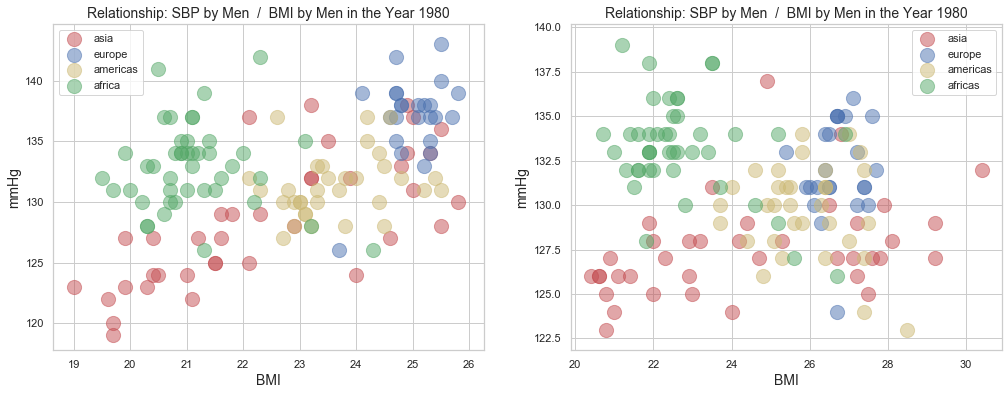

In [116]:
fig , ax = plt.subplots(1,2, figsize = (17,6))
ax[0].scatter(df_data.query("year=='1980' and region == 'asia'")['bmi'], 
               df_data.query("year=='1980' and region == 'asia'")['sbpm'], alpha=.5, s=200,c='r', label='asia')

ax[0].scatter(df_data.query("year=='1980' and region == 'europe'")['bmi'], 
              df_data.query("year=='1980' and region == 'europe'")['sbpm'], alpha=.5, s=200,c='b', label='europe')

ax[0].scatter(df_data.query("year=='1980' and region == 'americas'")['bmi'], 
              df_data.query("year=='1980' and region == 'americas'")['sbpm'], alpha=.5, s=200,c='y', label='americas')

ax[0].scatter(df_data.query("year=='1980' and region == 'africa'")['bmi'], 
              df_data.query("year=='1980' and region == 'africa'")['sbpm'], alpha=.5, s=200,c='g', label='africa')
ax[0].set_title('Relationship: SBP by Men  /  BMI by Men in the Year 1980', fontsize = 14)
ax[0].set_xlabel('BMI', fontsize = 14)
ax[0].set_ylabel('mmHg', fontsize = 14)
# -------------------------------------------------------------------------------------------------------------------#
ax[1].scatter(df_data.query("year=='2008' and region == 'asia'")['bmi'], 
              df_data.query("year=='2008' and region == 'asia'")['sbpm'], alpha=.5, s=200,c='r', label='asia')

ax[1].scatter(df_data.query("year=='2008' and region == 'europe'")['bmi'], 
              df_data.query("year=='2008' and region == 'europe'")['sbpm'], alpha=.5, s=200,c='b', label='europe')

ax[1].scatter(df_data.query("year=='2008' and region == 'americas'")['bmi'], 
              df_data.query("year=='2008' and region == 'americas'")['sbpm'], alpha=.5, s=200,c='y', label='americas')

ax[1].scatter(df_data.query("year=='2008' and region == 'africa'")['bmi'], 
              df_data.query("year=='2008' and region == 'africa'")['sbpm'], alpha=.5, s=200,c='g', label='africas');
ax[1].set_title('Relationship: SBP by Men  /  BMI by Men in the Year 1980', fontsize = 14)
ax[1].set_xlabel('BMI', fontsize = 14)
ax[1].set_ylabel('mmHg', fontsize = 14)
ax[0].legend()
ax[1].legend()
plt.show()

In [117]:
# Correlation for sbpm and bmi for 1980 and 2008

pd.concat([df_data.pivot_table(index='year', columns='region', aggfunc='corr').loc[(1980,'bmi'),'sbpm'],
           df_data.pivot_table(index='year', columns='region', aggfunc='corr').loc[(2008,'bmi'),'sbpm']], axis=1)

,1980,2008
,bmi,bmi
region,,
africa,-0.08,-0.35
americas,0.25,-0.20
asia,0.73,0.42
europe,0.40,0.11


#### Answer 6:  
* In **1980**, we can say that the SBP by men increases with a higher BMI, with a correlation coefficient of 0.43, which is a moderate positive correlation. The region with the highest correlation between these two indicators is **Asia** with a correlation coefficient of 0.73, which is a strong positive correlation.  
  
  
* **Asia** is also the region with the highest correlation coefficient in **2008**, but now it is a moderate positive correlation of 0.42, while other regions either have a weak or negative correlation.
___

<a id='q7'></a>
#### Question 7.
### What is the impact of SBP by men on life expectancy in the world?

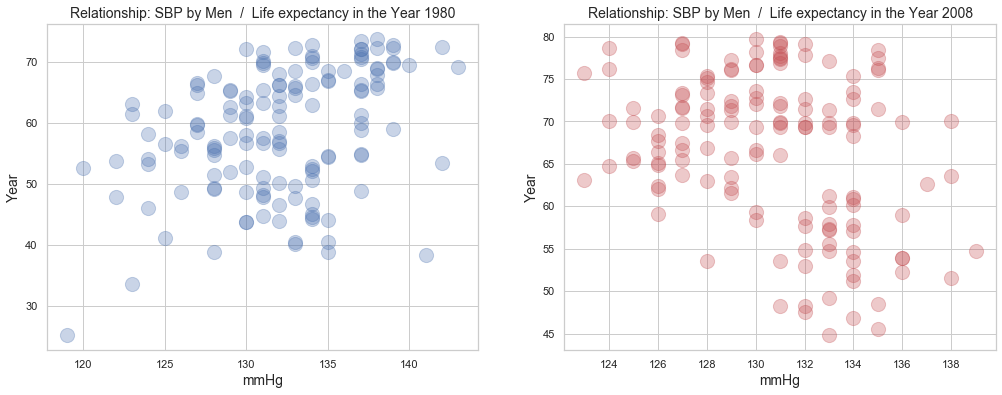

In [118]:
fig , ax = plt.subplots(1,2, figsize = (17,6))
ax[0].scatter(df_data.query("year=='1980'")['sbpm'], 
              df_data.query("year=='1980'")['life'], alpha=.3, s=200,c='b')
ax[0].set_title('Relationship: SBP by Men  /  Life expectancy in the Year 1980', fontsize = 14)
ax[0].set_xlabel('mmHg', fontsize = 14)
ax[0].set_ylabel('Year', fontsize = 14)
# -------------------------------------------------------------------------------------------------------------------#
ax[1].scatter(df_data.query("year=='2008'")['sbpm'], 
              df_data.query("year=='2008'")['life'], alpha=.3, s=200,c='r')
ax[1].set_title('Relationship: SBP by Men  /  Life expectancy in the Year 2008', fontsize = 14)
ax[1].set_xlabel('mmHg', fontsize = 14)
ax[1].set_ylabel('Year', fontsize = 14)
plt.show()

#### Answer 7:  
* 1980: From the graph above we can see that an increase in SBP also increases life expectancy. This is confirmed with Pearson's coefficient of 0.37 for which we can say that this correlation is moderate and positive.
  
  
* 2008: In the year 2008 we have the opposite situation, where from the graph we see that with an increase of SBP, is decreasing of life expectancy, and coefficient of correlation of -0.33 gives us information that relationship is moderate but negative.
___

<a id='conclusions'></a>  
## Conclusions

>When we look at this data, one of the first questions is, where in the world is the SBP by men with the highest value. This question is answered through looking for a country, a region of the world, and changing values in a time range. And so we can say that in 2008 the country with the highest SBP by men is Niger with 139 mmHG.
The region with the highest SBP is Africa and Europe had progressed the most in the observed period with decreasing of SBP.
Furthermore, we must emphasize that Asia had the lowest values of SBP by men and a moderate trend.
>
>From the year 1980 to 1998 in the world was a good trend in the decreasing SBP by men and from 1998 the mean of world SBP starts to increase. Indicative is that all regions from 1980 to approx. 1998  have decreasing trend, and after 1998 only Europe is decreasing in SBP by men, while Asia, Africa, and the Americas had increased in this value.
>
>With an exploration of correlations of SBP by men with GDP per capita, life expectancy, BMI, food intake, and SBP by women we see that world values of correlation are in 1980 for all indicators moderate positive and in 2008 correlation is weakly negative. Only indicator SBP by women is highly correlated in 1980 and 2008., but both SBP by men and women have a relationship with some other indicators which are not included in this research.
>
>### **Limitations:**  
>The time range of 29 years is relatively small and it would be much better if we had a bigger time range. Now is the year 2020 and from 2008 is 12 years of distance which is not included in this research.
Another limitation is that we not included all indicators which affected on SBP of men. 
This we see through a strong correlation between SBP for men and women, but not with other indicators.
Another limitation could be too small numbers of regions, and because of that, we didn't become more detailed picture where is higher SBP by men. It's possible to explore this data through a economical regions or regions by affiliation to the economical or political organizations.

>For more accurate research, we need more indicators to be able to answer the questions asked, as well as to answer what we can do to lower SPB if it is too high, because it poses a risk to our health.
>
>Globally SBP by men is increasing, and this is not a good trend.
Other regions of the world should follow the measures taken by Europe as it has reduced SBP in both men and women.

<a id='references'></a>  
## References

> https://en.wikipedia.org/wiki/Blood_pressure  
> https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
> https://en.wikipedia.org/wiki/Body_mass_index  
> https://www.python.org/dev/peps/pep-0257/  
> https://www.datacamp.com/community/tutorials/docstrings-python  
> https://www.youtube.com/watch?v=IGH4-ZhfVDk   
> https://www.youtube.com/watch?v=oY62o-tBHF4   
> https://www.statisticshowto.com/probability-and-statistics/how-to-find-a-coefficient-of-variation/  
> https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/range-statistics/  
> https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot